In [10]:
from typing import TypeVar, Generic
from logging import Logger
from imports import *
T = TypeVar('T')

class LoggedVar(Generic[T]):
    def __init__(self, value: T, name: str, logger: Logger) -> None:
        self.name = name
        self.logger = logger
        self.value = value

    def set(self, new: T) -> None:
        logger.info("Reading the raw data and target data from the data/raw folder")
        self.value = new

    def get(self) -> T:
        logger.info('test data')
        return self.value

logger = logs(path="logs/", file="data.logs")
rt = LoggedVar(5, 'runtime', logger)
rt.get()

INFO: 2022-09-27 09:45:51,840: test data


5

In [23]:
## testing feature selection techniques....

from sklearn.datasets import make_regression
# generate regression dataset
X, y = make_regression(n_samples=1000, n_features=100, n_informative=10, noise=0.1, random_state=1)
from sklearn.model_selection import train_test_split
# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)

In [26]:
# load and summarize the dataset
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
# generate regression dataset
X, y = make_regression(n_samples=1000, n_features=100, n_informative=10, noise=0.1, random_state=1)
# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)
# summarize
print('Train', X_train.shape, y_train.shape)
print('Test', X_test.shape, y_test.shape)

Train (670, 100) (670,)
Test (330, 100) (330,)


Feature 0: 0.009419
Feature 1: 1.018881
Feature 2: 1.205187
Feature 3: 0.000138
Feature 4: 0.167511
Feature 5: 5.985083
Feature 6: 0.062405
Feature 7: 1.455257
Feature 8: 0.420384
Feature 9: 101.392225
Feature 10: 0.387091
Feature 11: 1.581124
Feature 12: 3.014463
Feature 13: 0.232705
Feature 14: 0.076281
Feature 15: 4.299652
Feature 16: 1.497530
Feature 17: 0.261242
Feature 18: 5.960005
Feature 19: 0.523219
Feature 20: 0.003365
Feature 21: 0.024178
Feature 22: 0.220958
Feature 23: 0.576770
Feature 24: 0.627198
Feature 25: 0.350687
Feature 26: 0.281877
Feature 27: 0.584210
Feature 28: 52.196337
Feature 29: 0.046855
Feature 30: 0.147323
Feature 31: 0.368485
Feature 32: 0.077631
Feature 33: 0.698140
Feature 34: 45.744046
Feature 35: 2.047376
Feature 36: 0.786270
Feature 37: 0.996190
Feature 38: 2.733533
Feature 39: 63.957656
Feature 40: 231.885540
Feature 41: 1.372448
Feature 42: 0.581860
Feature 43: 1.072930
Feature 44: 1.066976
Feature 45: 0.344656
Feature 46: 13.951551
Feature 47: 3.5

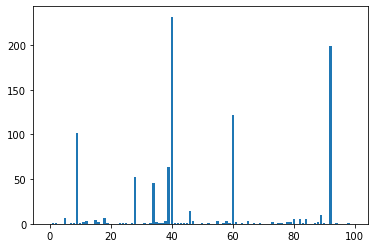

In [57]:
# example of correlation feature selection for numerical data
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from matplotlib import pyplot

# feature selection
def select_features(X_train, y_train, X_test):
	# configure to select all features
	fs = SelectKBest(score_func=f_regression, k=20)
	# learn relationship from training data
	fs.fit(X_train, y_train)
	# transform train input data
	X_train_fs = fs.transform(X_train)
	# transform test input data
	X_test_fs = fs.transform(X_test)
	return X_train_fs, X_test_fs, fs

# load the dataset
X, y = make_regression(n_samples=1000, n_features=100, n_informative=10, noise=0.1, random_state=1)
# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)
# feature selection
X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test)
# what are scores for the features
for i in range(len(fs.scores_)):
	print('Feature %d: %f' % (i, fs.scores_[i]))
# plot the scores
pyplot.bar([i for i in range(len(fs.scores_))], fs.scores_)
pyplot.show()

In [32]:
X_train_fs

array([[-1.48178836,  0.31796251,  0.34689416, ...,  1.84972109,
         0.72490829,  0.16952573],
       [ 0.31377031, -0.98103428, -0.94615899, ..., -0.12150219,
         0.57875852, -1.03028732],
       [-0.68121489,  0.7122178 , -0.23589626, ..., -1.05556351,
         0.18834099,  0.96059188],
       ...,
       [-0.53045937,  0.21629528,  1.16263068, ..., -0.11695719,
         1.94082041,  1.72113145],
       [-1.43126274,  0.05019699,  0.29265029, ..., -0.48267966,
        -0.33501374,  0.61883734],
       [-0.62519622, -0.88218873, -0.48462293, ..., -0.18797853,
        -0.13601316, -0.46244458]])

In [93]:
df_ = pd.read_csv(r'D:\final_solution\solution_v1\data\raw\md_raw_dataset.csv', sep=';')

In [96]:
df_.columns[df_.isnull().any()].tolist()

['crystal_weight',
 'first_factor_x',
 'final_factor_x',
 'previous_adamantium',
 'Unnamed: 17',
 'etherium_before_start',
 'expected_start',
 'start_subprocess1',
 'start_critical_subprocess1',
 'predicted_process_end',
 'process_end',
 'subprocess1_end',
 'reported_on_tower',
 'opened',
 'chemical_x',
 'raw_kryptonite',
 'argon',
 'pure_seastone',
 'groups']

In [335]:

import pandas as pd
df = pd.read_csv(r'D:\final_solution\solution_v1\data\interim\feature_engg.csv')

rt = pd.read_csv(r'D:\final_solution\original\code_challenge\final_data_new.csv')
rt.dtypes

groups_Categorify                  int64
crystal_supergroup_Categorify      int64
ts_month                           int64
TE_groups_Categorify             float64
NA_argon                           int64
crystal_type_Categorify            int64
tracking                           int64
TE_crystal_type_Categorify       float64
place                              int64
argon                            float64
CE_TE_groups_Categorify            int64
ts_weekday                         int64
Cycle_Categorify                   int64
super_hero_group_Categorify        int64
TE_Cycle_Categorify              float64
time_diff_process                float64
expected_final_factor_x          float64
first_factor_x                   float64
NA_first_factor_x                  int64
dtype: object

In [336]:
from imports import *
config = load_config(r"D:\final_solution\solution_v1\config.yml")
preprocess = preprocessing(df, config)
# convertd types
df = preprocess.convert_dtypes()

In [426]:
def left_subtract(l1,l2):
    lst = []
    for i in l1:
        if i not in l2:
            lst.append(i)
    return lst
#################################################################################
def return_dictionary_list(lst_of_tuples):
    """ Returns a dictionary of lists if you send in a list of Tuples"""
    orDict = defaultdict(list)
    # iterating over list of tuples
    for key, val in lst_of_tuples:
        orDict[key].append(val)
    return orDict
################################################################################
def find_remove_duplicates(list_of_values):
    """
    # Removes duplicates from a list to return unique values - USED ONLY ONCE
    """
    output = []
    seen = set()
    for value in list_of_values:
        if value not in seen:
            output.append(value)
            seen.add(value)
    return output

In [556]:
max_feats  = len(config['continous_col_feature_selection'])
fs = SelectKBest(score_func=mutual_info_regression, k=max_feats)
rt =fs.fit(df[config['continous_col_feature_selection']], df['target'])
mutual_info = dict(zip(config['continous_col_feature_selection'], rt.scores_))
mutual_info = pd.DataFrame(mutual_info.items(), columns=['feature', 'score'])
mi_score = mutual_info.loc[mutual_info['score'] != 0].feature.tolist()
mi_score_dict = dict(zip(mutual_info.feature, mutual_info.score))

In [559]:
numvars = mi_score
correlation_dataframe = df[mi_score].corr().abs().unstack().sort_values().drop_duplicates()
corrdf = pd.DataFrame(correlation_dataframe[:].reset_index())
corrdf.columns = ['var1','var2','coeff']
corrdf1 = corrdf[corrdf['coeff']>=0.70]
corrdf1 = corrdf1[corrdf1['var1'] != corrdf1['var2']]
corrdf1
corr_var = corrdf1['var1'].tolist()
corr_var.extend(corrdf1['var2'].tolist())


In [540]:
rt = mutual_info.loc[mutual_info['feature'].isin(corr_var1)]
rt.sort_values(by='score', ascending=False).iloc[-1,0]

'final_factor_x'

In [542]:
mutual_info.columns

Index(['feature', 'score'], dtype='object')

In [551]:
mi_score_ = mutual_info[mutual_info.feature != rt.sort_values(by='score', ascending=False).iloc[-1,0]]

In [555]:
mi_score_.loc[mi_score_['score'] !=0].feature.tolist()

['TE_crystal_supergroup_Categorify',
 'TE_crystal_type_Categorify',
 'CE_TE_crystal_supergroup_Categorify',
 'expected_factor_x',
 'first_factor_x',
 'expected_final_factor_x',
 'previous_adamantium',
 'etherium_before_start',
 'chemical_x',
 'raw_kryptonite',
 'argon',
 'pure_seastone']

In [550]:
mi_score_[mi_score_['score'] != 0].feature.tolist()
mi_score_

TypeError: list indices must be integers or slices, not str

In [541]:
mi_score_ = mutual_info.drop(rt.sort_values(by='score', ascending=False).iloc[-1,0])

KeyError: "['final_factor_x'] not found in axis"

In [527]:
i = mutual_info.loc[mutual_info['feature'] == 'final_factor_x'].score.tolist()[0] 
j= mutual_info.loc[mutual_info['feature'] == 'expected_final_factor_x'].score.tolist()[0]
print(i,j)

0.007590436393311251 0.007959602978181657


In [529]:
for i in corrdf1.corr_var1():
    t = mutual_info.loc[mutual_info['feature'] == i].score.tolist()[0] 

AttributeError: 'DataFrame' object has no attribute 'corr_var1'

In [514]:
# compare final_factor_x and exppected_final_factor_x mi_score
corr_var1 = corrdf1['var1'].tolist()
corr_var1.extend(corrdf1['var2'].tolist())

0.007959602978181657

In [561]:
df = pd.read_csv(r'D:\final_solution\solution_v1\data\interim\feature_engg.csv')

In [563]:
class features_selection_cont_var(object):
    
    def __init__(self, df, var_list, target) -> None:
        self.df = df
        self.var_list = var_list
        self.target = target

    def find_correlated_feature(self, non_zero_mi_cols):
        # Correlated features
        self.var_list = non_zero_mi_cols
        corrdf = self.df[self.var_list].corr().abs(
        ).unstack().sort_values().drop_duplicates()
        corrdf = pd.DataFrame(corrdf[:].reset_index())
        corrdf.columns = ['var1', 'var2', 'coeff']
        corrdf1 = corrdf[corrdf['coeff'] >= 0.70]
        corrdf1 = corrdf1[corrdf1['var1'] != corrdf1['var2']]
        corr_var = corrdf1['var1'].tolist()
        corr_var.extend(corrdf1['var2'].tolist())
        return corr_var

    def mutual_info(self) -> list:
        # Mutual information
        fs = SelectKBest(score_func=mutual_info_regression, k=30)
        rt = fs.fit(self.df[self.var_list], self.df[self.target])
        mutual_info = dict(zip(self.var_list, rt.scores_))
        mutual_info = pd.DataFrame(
            mutual_info.items(), columns=['feature', 'score'])
        non_zero_cols = mutual_info.loc[mutual_info['score'] != 0].feature.tolist(
        )
        return mutual_info, non_zero_cols

    def remove_corr_features(self, mi_df, var_corr) -> list:
        self.df = mi_df
        self.var_list = var_corr
        continous_features = self.df.loc[self.df['feature'].isin(
            self.var_list)]
        mi_score_df = self.df[self.df.feature != continous_features.sort_values(
            by='score', ascending=False).iloc[-1, 0]]
        final_cont_features = mi_score_df.loc[mi_score_df['score'] != 0].feature.tolist(
        )
        return final_cont_features

In [577]:
 # Load config file
config = load_config(r"D:\final_solution\solution_v1\config.yml")
cont_features_df = features_selection_cont_var(df, config['continous_col_feature_selection'], config['target_col'])
mi_df, selected_cols = cont_features_df.mutual_info()

c:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [578]:
cont_features_df.var_list = selected_cols

In [579]:
cor_var = cont_features_df.find_correlated_feature(selected_cols)

In [580]:

cont_features_df.var_list = cor_var
cont_features_df.df = mi_df
final_continous_var = cont_features_df.remove_corr_features(mi_df, cor_var)

In [614]:
data = df[['cycle_Categorify', 'target']]

In [ ]:
def anova(data, i): 
    try:
        from scipy import stats
        grps = pd.unique(data[i].values)
        d_dat = {grp:data[i][data[i] == grp] for grp in grps}
        k = len(pd.unique(data[i]))  # number of conditions
        N = len(data.values)  # conditions times participants
        n = data.groupby(i).size()[0] #Participants in each condition
        ss_between = (sum(data.groupby(i).sum()['target'] ** 2)/n) - (data['target'].sum() ** 2)/N
        sum_y_pred= sum([value**2 for value in data['target'].values])
        ss_within = sum_y_pred - sum(data.groupby(i).sum()['target'] ** 2)/n
        ss_total = sum_y_pred - (data['target'].sum() ** 2)/N
        ms_between = ss_between/(k-1)
        ms_within = ss_within/(N-k)
        f = ms_between/ms_within
        p = stats.f.sf(f, k-1, N-k)
        eta_squared = ss_between/ss_total
        omega_squared = (ss_between - (k-1)*ms_within)/(ss_total + ms_within)
        # print(f, p)
        return p
    except Exception as e:
        print(e)

rt = []
y = []
for i in config['cat_cols_feature_selection']:
    r = anova(df, str(i))
    rt.append(r)
    y.append(i)


In [652]:
cols = [anova(df, str(x)) for x in config['cat_cols_feature_selection'] ]
print(cols)

0
0
0
0
0
0
0
0
0
0
0
[0.0, None, 1.9473860627883925e-23, None, 0.9999723237619043, None, None, None, None, 2.8202478143993497e-143, 0.8683213466475195, 0.9737087496116154, 0.9837182210204771, 0.9031208790281496, 0.24439467087302916, 0.9798531337774941, 0.9798592623340466, 0.5451999259774027, 0.7462416573446744, 0.9579291755702368, 0.9903874795715556, 0.9413731900980106, 0.9413731900980106, 0.9999671794905043, 0.1281021442761406, 0.6378542945157006, 0.35985134015687603, nan, None, None, None, None, 0.9125831380049118, None]


<ipython-input-641-ca8b463e9628>:13: RuntimeWarning: divide by zero encountered in double_scalars
  ms_between = ss_between/(k-1)


In [645]:
yu =pd.DataFrame({'feature':y, 'p_value':rt})
yu = yu.sort_values(by='p_value', ascending=False)
yu = yu[yu['p_value'] < 0.05]

In [653]:
yu.feature.tolist()

['tracking_times_Categorify', 'groups', 'super_hero_group_Categorify']

In [659]:
def anova(data, i):
    try:
        from scipy import stats
        grps = pd.unique(data[i].values)
        d_dat = {grp: data[i][data[i] == grp] for grp in grps}
        k = len(pd.unique(data[i]))  # number of conditions
        N = len(data.values)  # conditions times participants
        n = data.groupby(i).size()[0]  # Participants in each condition
        ss_between = (sum(data.groupby(i).sum()[
                      'target'] ** 2)/n) - (data['target'].sum() ** 2)/N
        sum_y_pred = sum([value**2 for value in data['target'].values])
        ss_within = sum_y_pred - sum(data.groupby(i).sum()['target'] ** 2)/n
        ss_total = sum_y_pred - (data['target'].sum() ** 2)/N
        ms_between = ss_between/(k-1)
        ms_within = ss_within/(N-k)
        f = ms_between/ms_within
        p = stats.f.sf(f, k-1, N-k)
        eta_squared = ss_between/ss_total
        omega_squared = (ss_between - (k-1)*ms_within)/(ss_total + ms_within)
        # print(f, p)
        return p
    except Exception as e:
        print(e)

class features_selection_cat_var(object):
    
    def __init__(self, df, var_list) -> None:
        self.df = df
        self.var_list = var_list

    def perform_anova_test(self) -> list:
        p_value = [anova(self.df, str(x))
                   for x in self.var_list]
        vars = [i for i in self.var_list]
        df_temp = pd.DataFrame(
            {'feature': vars, 'p_value': p_value})
        return df_temp

cat_features_selection = features_selection_cat_var(df, config['cat_cols_feature_selection'])
final_cat_var = cat_features_selection.perform_anova_test()

0
0
0
0
0
0
0
0
0
0
0


<ipython-input-659-a3e10ea57b60>:14: RuntimeWarning: divide by zero encountered in double_scalars
  ms_between = ss_between/(k-1)


In [661]:
final_cat_var[final_cat_var['p_value']<0.05].feature.tolist()

,feature,p_value
0,super_hero_group_Categorify,0.000000e+00
2,tracking_times_Categorify,1.947386e-23
9,groups,2.820248e-143


In [ ]:
def hyperparameter_search(self):
    # hyperparameter search for xgboost.
    self.xgb_model = xgb.XGBRegressor(objective="reg:linear", random_state=42,
                                        n_jobs=-1)
    search = RandomizedSearchCV(self.xgb_model,
                                param_distributions=self.config["parameter_grid_xgb"]["params"],
                                random_state=42, n_iter=200,
                                cv=5, verbose=1, n_jobs=1,
                                return_train_score=True)

    search.fit(self.df[self.final_columns], self.target)

    # self.report_best_scores(search.cv_results_, 1)
    with open('best_params.txt', 'w') as f:
        f.write(str(search.best_params_))

In [ ]:
# set a logger file
logger = logs(path="logs/", file="main.logs")

# Load config file
config = load_config(r"D:\final_solution\solution_v1\config.yml")

# read the raw data and target data from the data/raw folder
data = read_data()
raw_data, target_data = data.read_data()

# Merge the raw data and target data
merge_data = merge_dataset(raw_data, target_data)
df = merge_data.merge_dataset()
print(df.shape)
# df.to_csv('./data/interim/merged_df.csv', index=False)
# preprocessing the data

preprocess = preprocessing(df, config)
df = preprocess.drop_duplicate_columns()
# convertd types
df = preprocess.convert_dtypes()
df = preprocess.replace_values()
df = preprocess.processing_missing_values()
df = preprocess.interpolate_datetime()
df = preprocess.convert_dtypes()
df[config['date_cols']] = df[config['date_cols']].apply(pd.to_datetime)
df = preprocess.drop_duplicate_rows()
df = preprocess.remove_outliers()
# df.to_csv('./data/interim/imputed_df.csv', index=False)
# df.to_csv('./data/interim/imputed_df_original_outliers.csv', index=False)
# Feature Engineering
feat_engg = FeatEngg(df, config)
df = feat_engg.split_datetime_col()
df = feat_engg.split_datetime_col()
df = feat_engg.cal_time_diff()
df = feat_engg.categorify_columns()
df = feat_engg.target_encode_columns()
df = feat_engg.count_encode_columns()
df = feat_engg.transforming_target_continuous()
# df.to_csv('./data/interim/feature_engg.csv', index=False)
# Continous feature selection
cont_features_df = features_selection_cont_var(
df, config['continous_col_feature_selection'], config['target_col'])
mi_df, selected_cols = cont_features_df.mutual_info()
cont_features_df.var_list = selected_cols
cor_var = cont_features_df.find_correlated_feature(selected_cols)
cont_features_df.var_list = cor_var
cont_features_df.df = mi_df
# print(cor_var)
final_continous_var = cont_features_df.remove_corr_features(mi_df, cor_var)
print(final_continous_var)
cat_features_selection = features_selection_cat_var(
df, config['cat_cols_feature_selection'])
final_cat_var = cat_features_selection.perform_anova_test()
selected_features = final_continous_var + final_cat_var
print(selected_features)
df[selected_features].to_csv(
'./data/interim/selected_features.csv', index=False)
train_model = model_training(
df, config['target_col'], selected_features, config)
train_model.convert_to_DMatrix()
print('training model')
# train_model.base_model()  # Train base model
train_model.train_xgb()  # Train xgboost model to see performance improvement
error = train_model.evaluate_model()  # evaluate the model
train_model.save_model()

In [1]:
from imports import *
df = pd.read_csv(r'D:\final_solution\solution_v1\data\interim\feature_engg.csv')
df_selected = pd.read_csv(r'D:\final_solution\solution_v1\data\interim\selected_features.csv')

In [2]:
class model_training(object):
    def __init__(self, df, target, final_columns, config) -> None:
        self.df = df
        self.target = target
        self.final_columns = final_columns
        self.config = config
        self.model_params = self.config["logging_params"]["xgb"]
        self.param_grid = self.config["parameter_grid"]["params"]

    def hyperparameter_search(self):
        # hyperparameter search for xgboost.
        self.xgb_model = xgb.XGBRegressor(random_state=42)
        search = RandomizedSearchCV(estimator=self.xgb_model,
                                    param_distributions=self.config["parameter_grid"]["params"],
                                    random_state=42,
                                    cv=5, scoring='neg_mean_squared_error')
        print(self.df[self.final_columns].shape)
        # print(self.target.shape)
        search.fit(self.df[self.final_columns], self.target)
        print(search.best_params_)
        # self.report_best_scores(search.cv_results_, 1)
        with open('best_params.txt', 'w') as f:
            f.write(str(search.best_score_))

In [3]:
config = load_config(r"D:\final_solution\solution_v1\config.yml")

# read the raw data and target data from the data/raw folder
data = read_data()
raw_data, target_data = data.read_data()

# Merge the raw data and target data
merge_data = merge_dataset(raw_data, target_data)
df = merge_data.merge_dataset()
print(df.shape)
# df.to_csv('./data/interim/merged_df.csv', index=False)
# preprocessing the data

preprocess = preprocessing(df, config)
df = preprocess.drop_duplicate_columns()
# convertd types
df = preprocess.convert_dtypes()
df = preprocess.replace_values()
df = preprocess.processing_missing_values()
df = preprocess.interpolate_datetime()
df = preprocess.convert_dtypes()
df[config['date_cols']] = df[config['date_cols']].apply(pd.to_datetime)
df = preprocess.drop_duplicate_rows()
df = preprocess.remove_outliers()
# df.to_csv('./data/interim/imputed_df.csv', index=False)
# df.to_csv('./data/interim/imputed_df_original_outliers.csv', index=False)
# Feature Engineering
feat_engg = FeatEngg(df, config)
df = feat_engg.split_datetime_col()
df = feat_engg.split_datetime_col()
df = feat_engg.cal_time_diff()
df = feat_engg.categorify_columns()
df = feat_engg.target_encode_columns()
df = feat_engg.count_encode_columns()
df = feat_engg.transforming_target_continuous()
# df.to_csv('./data/interim/feature_engg.csv', index=False)
# Continous feature selection
cont_features_df = features_selection_cont_var(
df, config['continous_col_feature_selection'], config['target_col'])
mi_df, selected_cols = cont_features_df.mutual_info()
cont_features_df.var_list = selected_cols
cor_var = cont_features_df.find_correlated_feature(selected_cols)
cont_features_df.var_list = cor_var
cont_features_df.df = mi_df
# print(cor_var)
final_continous_var = cont_features_df.remove_corr_features(mi_df, cor_var)
print(final_continous_var)
cat_features_selection = features_selection_cat_var(
df, config['cat_cols_feature_selection'])
final_cat_var = cat_features_selection.perform_anova_test()
selected_features = final_continous_var + final_cat_var
print(selected_features)
train_model = model_training(df, df['target'], selected_features, config)

['TE_crystal_type_Categorify', 'TE_unnamed_7_Categorify', 'human_measure', 'expected_factor_x', 'first_factor_x', 'expected_final_factor_x', 'previous_adamantium', 'etherium_before_start', 'raw_kryptonite', 'argon', 'pure_seastone', 'super_hero_group_Categorify', 'place_Categorify', 'tracking_times_Categorify', 'unnamed_7_Categorify', 'groups_Categorify', 'groups', 'place', 'unnamed_7', 'human_behavior_report']


In [6]:
df[selected_features]

,TE_crystal_type_Categorify,TE_unnamed_7_Categorify,human_measure,expected_factor_x,first_factor_x,expected_final_factor_x,previous_adamantium,etherium_before_start,raw_kryptonite,argon,pure_seastone,super_hero_group_Categorify,place_Categorify,tracking_times_Categorify,unnamed_7_Categorify,groups_Categorify,groups,place,unnamed_7,human_behavior_report
0,84.937783,95.930227,-0.980415,0.915998,0.532665,1.410975,0.911934,1.005818,-0.759242,0.228212,0.590982,8,2,2,18,21,45,2,19,4
1,81.799942,95.715821,-0.239383,0.201902,-0.267107,0.238216,0.987377,0.776728,0.209027,-0.210178,0.317028,8,3,2,4,11,35,1,2,4
2,83.403418,93.120763,0.718542,1.250101,-0.504409,0.820507,0.573049,1.437784,0.166793,0.878541,0.893517,8,2,2,7,21,45,2,1,2
3,83.375303,92.635474,0.857478,1.429184,-1.395198,1.084608,0.656672,-1.140018,0.175869,2.462305,2.327845,8,3,2,5,11,35,1,7,1
4,85.211666,94.492194,0.652275,0.320687,-0.555477,0.440760,0.655316,0.982725,0.293566,0.209718,0.579807,8,2,2,18,21,45,2,19,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8040,85.811580,97.678389,-0.671397,-0.222648,-0.095034,-0.426929,0.610262,0.631975,0.498742,0.272320,1.014375,2,2,2,13,55,16,2,20,3
8041,86.565133,101.292518,-0.238216,-0.160908,0.180190,-0.335904,1.482339,-1.124143,0.666227,0.146919,0.636588,2,2,2,3,55,16,2,13,4
8042,86.976553,94.350440,-0.246161,0.802626,-0.629351,-0.089922,1.387562,0.774717,-0.635267,0.545038,0.938381,2,2,2,10,55,16,2,6,1
8043,96.645439,99.016162,0.567862,0.847904,0.207186,1.614967,0.340350,1.492404,-0.747195,0.535596,0.932566,5,2,2,3,55,16,2,13,3


In [ ]:
train_model.hyperparameter_search()

In [14]:
df[selected_features].dtypes

TE_crystal_type_Categorify     category
TE_unnamed_7_Categorify        category
human_measure                  category
expected_factor_x              category
first_factor_x                 category
expected_final_factor_x        category
previous_adamantium            category
etherium_before_start          category
raw_kryptonite                 category
argon                          category
pure_seastone                  category
super_hero_group_Categorify    category
place_Categorify               category
tracking_times_Categorify      category
unnamed_7_Categorify           category
groups_Categorify              category
groups                         category
place                          category
unnamed_7                      category
human_behavior_report          category
dtype: object

In [ ]:
df_ =

In [2]:
from imports import *
df= pd.read_csv(r'D:\final_solution\solv1_old\solution_v1\data\interim\feature_engg.csv')
df_selected = pd.read_csv(r'D:\final_solution\solution_v1\data\interim\selected_features.csv')
df_x = df[df_selected.columns.tolist()]
df_y = df['target']


In [8]:
params = {'n_estimators': 100, 'min_samples_split': 12, 'min_samples_leaf': 5, 'max_features': 2, 'max_depth': 100, 
'bootstrap': True}
randomforest = RandomForestRegressor(**params,  oob_score=True)
randomforest.set_params(**params)

RandomForestRegressor(max_depth=100, max_features=2, min_samples_leaf=5,
                      min_samples_split=12, oob_score=True)

In [61]:
rf = RandomForestRegressor(bootstrap= True, max_depth= 80, max_features= 3,
                                                min_samples_leaf= 3, min_samples_split= 8,
                                                 n_estimators = 1000, oob_score=True)
rf.fit(df_x, df_y)
print(rf.oob_score_) 

0.25145903768005984


In [62]:
# Get numerical feature importances
importances = list(rf.feature_importances_)

# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(df_selected.columns.tolist(), importances)]

# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: TE_crystal_type_Categorify Importance: 0.1
Variable: etherium_before_start Importance: 0.1
Variable: groups               Importance: 0.1
Variable: argon                Importance: 0.09
Variable: raw_kryptonite       Importance: 0.07
Variable: human_measure        Importance: 0.06
Variable: expected_factor_x    Importance: 0.06
Variable: first_factor_x       Importance: 0.06
Variable: expected_final_factor_x Importance: 0.06
Variable: previous_adamantium  Importance: 0.06
Variable: chemical_x           Importance: 0.06
Variable: pure_seastone        Importance: 0.06
Variable: TE_unnamed_7_Categorify Importance: 0.05
Variable: super_hero_group_Categorify Importance: 0.03
Variable: TE_crystal_supergroup_Categorify Importance: 0.02
Variable: cycle                Importance: 0.02
Variable: tracking_times_Categorify Importance: 0.0


In [65]:
explainer = shap.TreeExplainer(rf)
shap_values = explainer.shap_values(df_x)
shap.summary_plot(
    shap_values, df_x, plot_type="bar")
shap.summary_plot(
    shap_values, df_x)

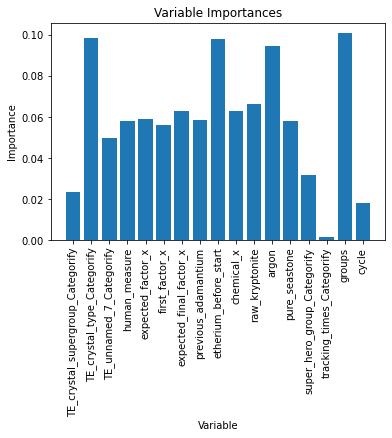

In [64]:
# list of x locations for plotting
x_values = list(range(len(importances)))

# Make a bar chart
plt.bar(x_values, importances, orientation = 'vertical')

# Tick labels for x axis
plt.xticks(x_values, df_selected.columns.tolist(), rotation='vertical')

# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances'); 

In [53]:
# Import tools needed for visualization
from sklearn.tree import export_graphviz
import pydot

# Pull out one tree from the forest
tree = random_forest_out_of_bag.estimators_[5]

# # Export the image to a dot file
# export_graphviz(tree, out_file = 'tree.dot', feature_names = df_selected.columns.tolist(), rounded = True, precision = 1)

# # Use dot file to create a graph
# (graph, ) = pydot.graph_from_dot_file('tree.dot')

# # Write graph to a png file
# graph.write_png('tree.png');

# Extract the small tree
# tree_small = rf_small.estimators_[5]

# Save the tree as a png image
export_graphviz(tree, out_file = 'small_tree.dot', feature_names = df_selected.columns.tolist(), rounded = True, precision = 1)
(graph, ) = pydot.graph_from_dot_file(r'D:\final_solution\solution_v1\small_tree.dot')

In [ ]:
def hyperparameter_tuning(self):
    # hyperparameter tuning.
    # enable categorical features
    self.xgb_model = xgb.XGBRegressor(objective='reg:squarederror', enable_categorical=True)
    self.grid_search = GridSearchCV(
        self.xgb_model, self.param_grid, scoring='neg_mean_squared_error', cv=3, verbose=2, n_jobs=-1)
    self.grid_search.fit(self.train[self.final_columns],
                            self.train.target)
    self.best_params = self.grid_search.best_params_
    print(self.best_params)

In [41]:
# X is a dataframe we created in previous snippet
Xy = xgb.DMatrix(df_x, df_y, enable_categorical=True)
booster = xgb.train({"tree_method": "hist", "max_cat_to_onehot": 5}, Xy)
# Must use JSON for serialization, otherwise the information is lost
booster.save_model("categorical-model.json")

In [42]:
SHAP = booster.predict(Xy, pred_interactions=True)

# categorical features are listed as "c"
print(booster.feature_types)
# Get feature importances
booster.feature_importances_

['c', 'c', 'c', 'c', 'c', 'c', 'c', 'c', 'c', 'c', 'c', 'c', 'c', 'c', 'c', 'c', 'c']


AttributeError: 'Booster' object has no attribute 'feature_importances_'

In [7]:
X_train, X_val, y_train, y_val = train_test_split(df_x, df_y, test_size=0.2)
regr = RandomForestRegressor()
regr.fit(X_train, y_train)
y_pred = regr.predict(X_val)


In [14]:
y_pred

array([-0.65154696,  0.10651902, -0.16311294, ...,  0.26480901,
        0.83526067, -0.04550748])

In [16]:
y_val

5842   -1.298118
3865    0.197087
1223    0.760419
1251   -1.422453
4617    0.091033
          ...   
6990    0.486105
7735    0.373135
7099    1.024341
566     1.639874
3847   -0.057352
Name: target, Length: 1609, dtype: float64

In [ ]:


    # def hyperparameter_search(self):
    #     # hyperparameter search for xgboost.
    #     self.xgb_model = xgb.XGBRegressor(objective="reg:linear", random_state=42,
    #                                       n_jobs=-1)
    #     search = GridSearchCV(self.xgb_model,
    #                           param_grid=self.config["parameter_grid"]["params"],
    #                           scoring='neg_mean_squared_error',
    #                           cv=5, verbose=1,
    #                           return_train_score=True)

    #     search.fit(self.df[self.final_columns], self.target)

    #     # self.report_best_scores(search.cv_results_, 1)
    #     with open('best_params.txt', 'w') as f:
    #         f.write(str(search.best_params_))
    def plot_linear_reg(self, y_pred):
        plt.figure(figsize=(10, 10))
        plt.scatter(self.y_test, y_pred)
        plt.xlabel('True Values')
        plt.ylabel('Predictions')
        plt.savefig('./reports/figures/linear_reg.png')
        plt.show()

    def plot_residuals(self, y_pred):
        plt.figure(figsize=(10, 10))
        plt.scatter(y_pred, self.y_test - y_pred)
        plt.xlabel('Predictions')
        plt.ylabel('Residuals')
        plt.savefig('./reports/figures/residuals.png')
        # plt.show()

    def plot_qq(self, y_pred):
        from scipy import stats
        plt.figure(figsize=(10, 10))
        stats.probplot(self.y_test - y_pred, dist="norm", plot=plt)
        plt.savefig('./reports/figures/qq_plot.png')
        plt.show()


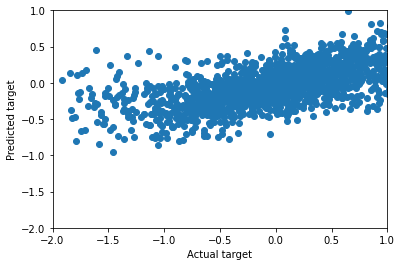

In [18]:
from sklearn import metrics
import matplotlib.pyplot as plt
mse = metrics.mean_squared_error(y_val, y_pred)
rmse = mse**0.5
rmse

plt.scatter(y_val, y_pred)
plt.xlim(-2, 1)
plt.ylim(-2, 1)
plt.ylabel('Predicted target')
plt.xlabel('Actual target')
plt.plot([40,140], [40,140], 'black') #1 to 1 line

In [ ]:
plt.figure(figsize=(15, 5))
plt.plot(test_df['DEPTH'], test_df['DT'], label='Actual DT')
plt.plot(test_df['DEPTH'], test_df['TEST_DT'], label='Predicted DT')
plt.xlabel('Depth (m)')
plt.ylabel('DT')
plt.ylim(40, 140)
plt.legend()
plt.grid()

In [81]:
df_x_ = df['ts_weekday']
features = pd.get_dummies(df_x_, drop_first=False)
features.columns = [f'weekday_{i}' for i in range(7)]
features.to_clipboard()

In [37]:
len(df_x) * 0.70

5631.5

In [16]:
np.int64(np.linspace(1, 6000, 20))


array([   1,  316,  632,  948, 1263, 1579, 1895, 2211, 2526, 2842, 3158,
       3474, 3789, 4105, 4421, 4737, 5052, 5368, 5684, 6000], dtype=int64)

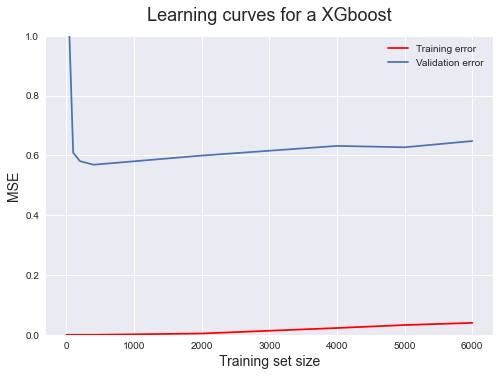

In [33]:
from xgboost.sklearn import XGBRegressor
# Load config file
config = load_config(r"D:\final_solution\solv1_old\solution_v1\config.yml")
from sklearn.model_selection import learning_curve
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.model_selection import RandomizedSearchCV
train_sizes = [1,100,200, 400, 2000, 4000, 5000, 6000]
# train_sizes = np.int64(np.linspace(1, 6000, 20))
# xgr =XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
#              colsample_bynode=1, colsample_bytree=0.9697304149116983,
#              gamma=2.684899398839369, gpu_id=-1, importance_type='gain',
#              interaction_constraints='', learning_rate=0.01,
#              max_delta_step=0, max_depth=29,
#              min_child_weight=33.522965527801304,
#              monotone_constraints='()', n_estimators=24, n_jobs=8,
#              num_parallel_tree=1, random_state=0, reg_alpha=1.8409864324165623,
#              reg_lambda=6.009121364172622, scale_pos_weight=1,
#              subsample=0.8948522801808735, tree_method='exact',
#              validate_parameters=1, verbosity=None)
xgr =  xgb.XGBRegressor(random_state=42, n_jobs=-1, learning_rate=0.05, max_depth=5, 
                n_estimators=1000, subsample=0.8, colsample_bytree=0.8)
# xgr = XGBRegressor(config["logging_params"]["xgb"])
# xgr= RandomForestRegressor('bootstrap': True, 'max_depth': 80, 'max_features': 3, 'min_samples_leaf': 3, 'min_samples_split': 8, 'n_estimators': 1000)
train_sizes, train_scores, validation_scores = learning_curve(
    estimator = xgr,
    X = df_x,
    y = df_y, train_sizes = train_sizes, cv = 5,
    scoring = 'neg_mean_squared_error',
    shuffle=True)

train_scores_mean = -train_scores.mean(axis = 1)
validation_scores_mean = -validation_scores.mean(axis = 1)
plt.style.use('seaborn')
plt.plot(train_sizes, train_scores_mean, label = 'Training error', color='red',)
plt.plot(train_sizes, validation_scores_mean, label = 'Validation error')
plt.ylabel('MSE', fontsize = 14)
plt.xlabel('Training set size', fontsize = 14)
plt.title('Learning curves for a XGboost', fontsize = 18, y = 1.03)
plt.ylim([0, 1])
plt.legend()


plt.style.use('seaborn')

In [9]:
from imports import *


class visualize(object):

    def __init__(self, y_test, model) -> None:
        self.y_test = y_test
        self.model = model

    def create_plot(self, y_pred):
        # create linear regression plot, residuals plot and qq plot using scipy
        fig, ax = plt.subplots(1, 3, figsize=(15, 5))
        ax[0].scatter(self.y_test, y_pred)
        ax[0].set_xlabel('Actual')
        ax[0].set_ylabel('Predicted')
        ax[0].set_title('Actual vs Predicted')
        ax[1].scatter(y_pred,  self.y_test - y_pred)
        ax[1].set_xlabel('Predicted')
        ax[1].set_ylabel('Residuals')
        ax[2].set_title('Residuals vs Predicted')
        # qq plot
        stats.probplot(self.y_test - y_pred, dist="norm", plot=ax[2])
        ax[2].set_title('QQ plot')
        plt.savefig('./reports/plots/linear_regression_plots.png')

    def rf_feature_importance(self, rf_model):
        self.model = rf_model
        # Feature importance
        feature_importance = pd.DataFrame(
            {'feature': self.X_test.columns, 'importance': self.model.feature_importances_})
        feature_importance.sort_values(
            'importance', ascending=False, inplace=True)
        feature_importance.to_csv(
            './reports/eval/rf_feature_importance.csv', index=False)
        # plot feature importance
        plt.figure(figsize=(10, 10))
        sns.barplot(x='importance', y='feature', data=feature_importance)
        plt.title('Random Forest Feature Importance')
        plt.tight_layout()
        plt.savefig('./reports/plots/rf_feature_importance.png')
        return feature_importance

In [10]:
rt = visualize(y_test, rf_model)


NameError: name 'y_test' is not defined

In [62]:
train_scores_mean = -train_scores.mean(axis = 1)
validation_scores_mean = -validation_scores.mean(axis = 1)
print('Mean training scores\n\n', pd.Series(train_scores_mean, index = train_sizes))
print('\n', '-' * 20) # sepa`rator
print('\nMean validation scores\n\n',pd.Series(validation_scores_mean, index = train_sizes))
import matplotlib.pyplot as plt



array([-0.75186214, -0.50983604, -0.50767314, -0.5748942 , -0.61491088,
       -0.61921281])

In [64]:
class model_training(object):
    def __init__(self, df, target, final_columns, config) -> None:
        self.df = df
        self.target = target
        self.final_columns = final_columns
        self.config = config
        self.model_params = self.config["logging_params"]["xgb"]
        self.param_grid = self.config["parameter_grid"]["params"]
    
    # Multiple regression model is our base model
    def base_model(self):
        X = self.df[self.final_columns]
        y = self.target
        X_train, X_test, y_train, y_test = train_test_split(
            X, y, test_size=0.2, random_state=23)
        # Add x0=1 to the first column of X
        X_train_0 = np.c_[np.ones((X_train.shape[0], 1)), X_train]
        X_test_0 = np.c_[np.ones((X_test.shape[0], 1)), X_test]
        # Build the model
        theta = np.matmul(np.linalg.inv(
            np.matmul(X_train_0.T, X_train_0)), np.matmul(X_train_0.T, y_train))
        # Make predictions
        y_pred = np.matmul(X_test_0, theta)
        # Evaluate the model
        mse = mean_squared_error(y_test, y_pred)
        # R_square
        sse = np.sum((y_pred - y_test)**2)
        sst = np.sum((y_test - y_test.mean())**2)
        R_square = 1 - (sse/sst)
        with open('./eval/RMSE_multiple_regression.txt', 'w') as f:
            f.write(str(np.sqrt(mse)))
            f.write(str(R_square))
            f.close()
        print('Root mean squared error of multiple regression model', np.sqrt(mse))
        print('r square of multiple regression', R_square)

array([1.1114712 , 0.42748455, 0.3935583 , 0.30400859, 0.2309932 ,
       0.21498242])

Mean training scores

 1       0.747603
2       0.506718
3       0.561184
10      0.672441
25      0.691639
50      0.461241
100     0.435281
200     0.424814
500     0.383862
800     0.355472
1100    0.345850
1400    0.329727
2000    0.304038
4000    0.251099
5000    0.235874
6000    0.214681
dtype: float64

 --------------------

Mean validation scores

 1       0.751862
2       0.751862
3       0.751862
10      0.751862
25      0.751862
50      0.506504
100     0.505896
200     0.507724
500     0.508586
800     0.527417
1100    0.536308
1400    0.541468
2000    0.568756
4000    0.595658
5000    0.611491
6000    0.625895
dtype: float64


(0.0, 40.0)

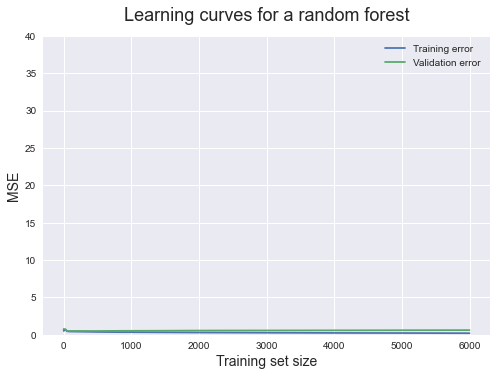

In [30]:
dmatrix = xgb.DMatrix(data=df_x, label=df_y)
params={ 'objective':'reg:squarederror',
         'max_depth': 6, 
         'colsample_bylevel':0.5,
         'learning_rate':0.01,
         'random_state':20}
cv_results = xgb.cv(dtrain=dmatrix, params=params, nfold=10, metrics={'rmse'}, as_pandas=True, seed=20, num_boost_round=1000)
print('RMSE: %.2f' % cv_results['test-rmse-mean'].min())

RMSE: 0.55


In [31]:
pickle.dump(cv_results, open('cv_results.pkl', 'wb'))

In [36]:
cv_results = pickle.load(open('cv_results.pkl', 'rb'))
cv_results.to_clipboard()

In [28]:
dmatrix = xgb.DMatrix(data=df_x, label=df_y,  enable_categorical=True)

In [29]:
params = { 'max_depth': [3,6,10],
           'learning_rate': [0.01, 0.05, 0.1],
           'n_estimators': [100, 500, 1000],
           'colsample_bytree': [0.3, 0.7]}
xgbr = xgb.XGBRegressor(seed = 20)
clf = GridSearchCV(estimator=xgbr, 
                   param_grid=params,
                   scoring='neg_mean_squared_error', 
                   verbose=1)
clf.fit(dmatrix, df_y)

TypeError: Singleton array array(<xgboost.core.DMatrix object at 0x0000028BD07DF1C0>, dtype=object) cannot be considered a valid collection.

In [2]:
select_ = df_selected.columns.tolist()
select_.append('target')
X = df[select_].drop('target', axis=1)
y = df['target']

In [3]:
params = { 'n_estimators': [100, 150],
    'max_depth': [2, 3],
    'learning_rate': [0.05, 0.1, 0.15, 0.20],
    'min_child_weight': [1, 2, 3]}

xgbr = xgb.XGBRegressor(seed = 20)
clf = RandomizedSearchCV(estimator=xgbr,
                        param_distributions=params,
                        scoring='neg_mean_squared_error',
                        n_iter=25,
                        verbose=1)
clf.fit(X, y)
print("Best parameters:", clf.best_params_)
print("Lowest RMSE: ", (-clf.best_score_)**(1/2.0))

Fitting 5 folds for each of 25 candidates, totalling 125 fits
Best parameters: {'n_estimators': 150, 'min_child_weight': 3, 'max_depth': 2, 'learning_rate': 0.05}
Lowest RMSE:  0.7174739578884294


In [21]:
df_selected.columns

Index(['TE_crystal_supergroup_Categorify', 'TE_crystal_type_Categorify',
       'TE_unnamed_7_Categorify', 'human_measure', 'expected_factor_x',
       'first_factor_x', 'expected_final_factor_x', 'previous_adamantium',
       'etherium_before_start', 'chemical_x', 'raw_kryptonite', 'argon',
       'pure_seastone', 'super_hero_group_Categorify',
       'tracking_times_Categorify', 'groups', 'cycle'],
      dtype='object')

In [ ]:
config = load_config(r"D:\final_solution\solution_v1\config.yml")
cont_features_df = features_selection_cont_var(
    df, config['continous_col_feature_selection'], config['target_col'])
mi_df, selected_cols = cont_features_df.mutual_info()
cont_features_df.var_list = selected_cols
cor_var = cont_features_df.find_correlated_feature(selected_cols)
cont_features_df.var_list = cor_var
cont_features_df.df = mi_df
# print(cor_var)
final_continous_var = cont_features_df.remove_corr_features(mi_df, cor_var)
print(final_continous_var)
cat_features_selection = features_selection_cat_var(
    df, config['cat_cols_feature_selection'])
final_cat_var = cat_features_selection.perform_anova_test()
selected_features = final_continous_var + final_cat_var
print(selected_features)
target = df['target']


In [23]:
df_org = pd.read_csv(r'D:\final_solution\original\code_challenge\final_data_new.csv')
df_org.dtypes.to_clipboard()

In [9]:
train_model = model_training(df, target, selected_features, config)

In [10]:
from imports import *
train_model.hyperparameter_search()

(8045, 14)
(8045,)
{'n_estimators': 100, 'min_child_weight': 3, 'max_depth': 2, 'learning_rate': 0.15}


In [ ]:
config = load_config(r"D:\final_solution\solution_v1\config.yml")

# read the raw data and target data from the data/raw folder
data = read_data()
raw_data, target_data = data.read_data()

# Merge the raw data and target data
merge_data = merge_dataset(raw_data, target_data)
df = merge_data.merge_dataset()
print(df.shape)
# df.to_csv('./data/interim/merged_df.csv', index=False)
# preprocessing the data

preprocess = preprocessing(df, config)
df = preprocess.drop_duplicate_columns()
# convertd types
df = preprocess.convert_dtypes()
df = preprocess.replace_values()
df = preprocess.processing_missing_values()
df = preprocess.interpolate_datetime()
df = preprocess.convert_dtypes()
df[config['date_cols']] = df[config['date_cols']].apply(pd.to_datetime)
df = preprocess.drop_duplicate_rows()
df = preprocess.remove_outliers()
# df.to_csv('./data/interim/imputed_df.csv', index=False)
# df.to_csv('./data/interim/imputed_df_original_outliers.csv', index=False)
# Feature Engineering
feat_engg = FeatEngg(df, config)
df = feat_engg.split_datetime_col()
df = feat_engg.split_datetime_col()
df = feat_engg.cal_time_diff()
df = feat_engg.categorify_columns()
df = feat_engg.target_encode_columns()
df = feat_engg.count_encode_columns()
df = feat_engg.transforming_target_continuous()
# df.to_csv('./data/interim/feature_engg.csv', index=False)
# Continous feature selection
cont_features_df = features_selection_cont_var(
    df, config['continous_col_feature_selection'], config['target_col'])
mi_df, selected_cols = cont_features_df.mutual_info()
cont_features_df.var_list = selected_cols
cor_var = cont_features_df.find_correlated_feature(selected_cols)
cont_features_df.var_list = cor_var
cont_features_df.df = mi_df
# print(cor_var)
final_continous_var = cont_features_df.remove_corr_features(mi_df, cor_var)
print(final_continous_var)
cat_features_selection = features_selection_cat_var(
    df, config['cat_cols_feature_selection'])
final_cat_var = cat_features_selection.perform_anova_test()
selected_features = final_continous_var + final_cat_var
print(selected_features)
target = df['target']
# df[selected_features].to_csv('./data/interim/selected_features.csv', index=False)
train_model = model_training(df, target, selected_features, config)
train_model.convert_to_DMatrix()
print('training model')
# train_model.base_model()  # Train base model
# train_model.train_xgb()  # Train xgboost model to see performance improvement
# error = train_model.evaluate_model()  # evaluate the model
# train_model.save_model()
train_model.hyperparameter_search()

In [4]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


In [10]:
from sklearn.model_selection import GridSearchCV
import numpy as np

max_features_range = np.arange(1,6,1)
n_estimators_range = np.arange(10,200,10)
param_grid = dict(max_features=max_features_range, n_estimators=n_estimators_range)

rf = RandomForestRegressor(random_state = 42)

grid = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_features': array([1, 2, 3, 4, 5]),
                         'n_estimators': array([ 10,  20,  30,  40,  50,  60,  70,  80,  90, 100, 110, 120, 130,
       140, 150, 160, 170, 180, 190])},
             scoring='neg_mean_squared_error')

In [11]:
print("The best parameters are %s with a score of %0.2f" % (grid.best_params_, grid.best_score_))

The best parameters are {'max_features': 5, 'n_estimators': 190} with a score of -0.35


In [12]:
# Create and train model
rf = RandomForestRegressor(n_estimators=grid.best_params_['n_estimators'], max_features=grid.best_params_['max_features'], random_state=42)
rf.fit(x_train, y_train)
# Predict on test data
prediction = rf.predict(x_test)
# Compute mean squared error
mse = mean_squared_error(y_test, prediction)

In [14]:
mse ** 2

0.10303840417993985

In [10]:
from sklearn.model_selection import GridSearchCV

# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300]
}

# Create a base model
rf = RandomForestRegressor(random_state = 42)

# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2, return_train_score=True)
# Fit the grid search to the data
grid_search.fit(x_train, y_train);

Fitting 3 folds for each of 216 candidates, totalling 648 fits


KeyboardInterrupt: 

In [4]:

from sklearn.tree import plot_tree, export_text
base_model = RandomForestRegressor(random_state=42, n_jobs=-1).fit(x_train, y_train)
base_train_acc= base_model.score(x_train, y_train)
base_test_acc = base_model.score(x_test, y_test)
print(base_train_acc, base_test_acc)

0.9210267973887352 0.4505179446609472


In [5]:
def test_params(**params):
    model = RandomForestRegressor(random_state=42, n_jobs=-1, **params).fit(x_train, y_train)
    return model.score(x_train, y_train), model.score(x_test, y_test)
def test_params_plot(param_name, param_values):
    train_acc, test_acc= [], []
    for value in param_values:
        params = {param_name: value}
        train, test = test_params(**params)
        train_acc.append(train)
        test_acc.append(test)
    plt.figure(figsize=(10, 5))
    plt.title('overfitting curve', param_name)
    plt.plot(param_values, train_acc, label='train')
    plt.plot(param_values, test_acc, label='test')
    plt.xlabel(param_name)
    plt.ylabel('accuracy')
    plt.legend(['training', 'testing'])

(0.1932586297152873, 0.10040366330689976)

In [665]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [666]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(x, y)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


KeyboardInterrupt: 

In [ ]:
rf_random.best_params_

In [595]:
### Anova test
DFbetween =  data.groups.nunique() - 1
DFwithin = len(data) - data.groups.nunique()
DFtotal = len(data) - 1
SSbetween = (sum(data.groupby('group').sum()['weight']**2)/data.groups.nunique())  - (data['weight'].sum()**2)/len(data)


SSbetween = (sum(data.groupby('groups').sum()['target']**2)) - (data['groups'].sum()**2)
sum_y_squared = sum([value**2 for value in data['weight'].values])
SSwithin = sum_y_squared - sum(data.groupby('group').sum()['weight']**2)
SStotal = sum_y_squared - (data['weight'].sum()**2)
MSbetween = SSbetween/DFbetween
MSwithin = SSwithin/DFwithin

In [501]:
# example of mutual information feature selection for numerical input data
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_regression
import copy
numvars = config['continous_col_feature_selection']
correlation_dataframe = df[config['continous_col_feature_selection']].corr().abs().unstack().sort_values().drop_duplicates()
corrdf = pd.DataFrame(correlation_dataframe[:].reset_index())
corrdf.columns = ['var1','var2','coeff']
corrdf1 = corrdf[corrdf['coeff']>=0.70]
corrdf1 = corrdf1[corrdf1['var1'] != corrdf1['var2']]
correlated_pair = list(zip(corrdf1['var1'].values.tolist(),corrdf1['var2'].values.tolist()))
corr_pair_dict = dict(return_dictionary_list(correlated_pair))
corr_list = find_remove_duplicates(corrdf1['var1'].values.tolist()+corrdf1['var2'].values.tolist())
keys_in_dict = list(corr_pair_dict.keys())
reverse_correlated_pair = [(y,x) for (x,y) in correlated_pair]
reverse_corr_pair_dict = dict(return_dictionary_list(reverse_correlated_pair))
max_feats = len(corr_list)
sel_function = mutual_info_regression
fs = SelectKBest(score_func=sel_function, k=max_feats)
fs.fit(df[corr_list], df['target'])
mutual_info = dict(zip(corr_list,fs.scores_))
#### The first variable in list has the highest correlation to the target variable ###
sorted_by_mutual_info =[key for (key,val) in sorted(mutual_info.items(), key=lambda kv: kv[1],reverse=True)]
#####   Now we select the final list of correlated variables ###########
selected_corr_list = []
#### You have to make multiple copies of this sorted list since it is iterated many times ####

orig_sorted = copy.deepcopy(sorted_by_mutual_info)
copy_sorted = copy.deepcopy(sorted_by_mutual_info)
copy_pair = copy.deepcopy(corr_pair_dict)
#### select each variable by the highest mutual info and see what vars are correlated to it
for each_corr_name in copy_sorted:
    ### add the selected var to the selected_corr_list
    selected_corr_list.append(each_corr_name)
    for each_remove in copy_pair[each_corr_name]:
        #### Now remove each variable that is highly correlated to the selected variable
        if each_remove in copy_sorted:
            copy_sorted.remove(each_remove)
##### Now we combine the uncorrelated list to the selected correlated list above
rem_col_list = left_subtract(numvars,corr_list)
final_list = rem_col_list + selected_corr_list
removed_cols = left_subtract(numvars, final_list)

KeyError: 'expected_final_factor_x'

In [502]:
mutual_info

{'final_factor_x': 0.007590176417766159,
 'expected_final_factor_x': 0.007958343897398912}

In [494]:
reverse_corr_pair_dict

{'previous_factor_x': ['first_factor_x'],
 'final_factor_x': ['expected_final_factor_x']}

In [471]:
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_regression
import copy
# numvars =config['continous_col_feature_selection']
correlation_dataframe = df[config['continous_col_feature_selection']].corr().abs().unstack().sort_values().drop_duplicates()
corrdf = pd.DataFrame(correlation_dataframe[:].reset_index())
corrdf.columns = ['var1','var2','coeff']
corrdf1 = corrdf[corrdf['coeff']>=0.70]
corrdf1 = corrdf1[corrdf1['var1'] != corrdf1['var2']]
corr_var =  corrdf1['var1'].tolist()
corr_var.extend(corrdf1['var2'].tolist())


In [469]:
corr = df[config['continous_col_feature_selection']].corr()
corr = corr.abs().unstack().sort_values(kind="quicksort").reset_index()
corr.columns = ['feature1', 'feature2', 'corr_value']
corr = corr[corr['feature1'] != corr['feature2']]
corr = corr[corr['corr_value'] > 0.9]


In [456]:
mi = mutual_info_regression(df[config['continous_col_feature_selection']],df['target'])
# mutual_info = dict(zip(config['continous_col_feature_selection'], mi.scores_))
# mutual_info = pd.DataFrame(mutual_info.items(), columns=['feature', 'score'])


mi = pd.Series(mi,index=config['continous_col_feature_selection'])

mi.sort_values(ascending=False, inplace=True)

In [449]:
max_feats  = len(list(np.unique(var1)))
fs = SelectKBest(score_func=mutual_info_regression, k=max_feats)
rt =fs.fit(df[list(np.unique(var1))], df['target'])
mutual_info = dict(zip(var1, rt.scores_))
mutual_info = pd.DataFrame(mutual_info.items(), columns=['feature', 'score'])
# sorted_by_mutual_info =[key for (key,val) in sorted(mutual_info.items(), key=lambda kv: kv[1],reverse=True)]
# sorted_by_mutual_info

In [444]:
from sklearn.feature_selection import f_regression
# assigning f and p values to 2 separate arrays
f_val, p_val = f_regression(df[config['continous_col_feature_selection']],df['target'])

# creating a dictionary from the arrays
feature_dict={'features':df[config['continous_col_feature_selection']].columns.tolist(),
              'f_score':f_val.tolist()}

# creating a sorted dataframe from the dictionary
# feature_df = pd.DataFrame(feature_dict).sort_values(by='f_scores', ascending=False).reset_index(drop=True)

# # printing 25 features with the highest scores
# feature_df.iloc[:25,:]['columns'].tolist()
f_.iloc[:15,:]['features'].tolist()

['TE_groups_Categorify',
 'TE_crystal_type_Categorify',
 'CE_TE_groups_Categorify',
 'TE_place_Categorify',
 'tracking',
 'TE_cycle_Categorify',
 'TE_unnamed_7_Categorify',
 'CE_TE_crystal_type_Categorify',
 'CE_TE_place_Categorify',
 'final_factor_x',
 'argon',
 'chemical_x',
 'expected_final_factor_x',
 'CE_TE_cycle_Categorify',
 'etherium_before_start']

In [386]:
f_ = pd.DataFrame(feature_dict).sort_values(by='f_score', ascending=False).reset_index(drop=True)

In [230]:
# select continous  columns from the dataframe
continuous_cols = df.select_dtypes(include=['float64', 'int64']).columns
# select categorical columns from the dataframe
categorical_cols = df.select_dtypes(include=['object']).columns

In [231]:
from sklearn.feature_selection import SelectKBest, chi2
X = df[config['continous_col_feature_selection']]
y = df['target']

In [232]:
X = df[config['cat_cols_feature_selection']]
y = df['target']

In [233]:
# df[config['cat_cols']] = df[config['cat_cols']].astype('int', errors='ignore')
X = df[config['required_columns']]
y = df['target']

In [261]:
x = df[config['continous_col_feature_selection']]
# .drop('target', axis=1)


In [264]:
x.shape

(8045, 32)

In [267]:
from sklearn.feature_selection import VarianceThreshold
var_selector=VarianceThreshold(threshold=0.25)
df_var = var_selector.fit_transform(x)

In [268]:
var_selector.get_support()

array([ True,  True,  True, False,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True])

In [259]:
from sklearn.feature_selection import VarianceThreshold
X = [[0, 2, 0, 3], [0, 1, 4, 3], [0, 1, 1, 3]]
selector = VarianceThreshold()
selector.fit_transform(x)

array([[ 8.        ,  2.        ,  2.        , ..., -0.75924161,
         0.2282117 ,  0.5909816 ],
       [ 8.        ,  3.        ,  2.        , ...,  0.20902723,
        -0.21017843,  0.31702847],
       [ 8.        ,  2.        ,  2.        , ...,  0.16679251,
         0.87854094,  0.89351714],
       ...,
       [ 2.        ,  2.        ,  2.        , ..., -0.63526695,
         0.54503794,  0.93838062],
       [ 5.        ,  2.        ,  2.        , ..., -0.74719526,
         0.53559639,  0.93256561],
       [ 5.        ,  2.        ,  2.        , ..., -0.75572168,
         0.21917725,  0.66588405]])

In [260]:
selector.get_support()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
       False,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True])

In [280]:
df.target

0      -0.275883
1      -0.047189
2      -0.257194
3      -0.034829
4      -0.238916
          ...   
8040    0.730836
8041    0.754163
8042    0.777534
8043    0.802206
8044    0.825277
Name: target, Length: 8045, dtype: float64

In [290]:
X = df[config['required_columns']]
y = df['target']

In [296]:
X = df[config['required_columns']]
y = df['target']
model = DecisionTreeRegressor()
rfe = RFECV(estimator=model, step=10, cv=5)
rfe_fit = rfe.fit(X,y)
rfe_dict =dict(zip(np.array(X.columns),rfe_fit.ranking_))
rfe_dict = {k: v for k, v in sorted(rfe_dict.items(), key=lambda item: item[1])}
col_names = [k for k, v in rfe_dict.items() if v == 1]

In [298]:
col_names

['groups',
 'TE_crystal_type_Categorify',
 'TE_groups_Categorify',
 'tracking',
 'etherium_before_start',
 'argon']

In [301]:
X = df[config['required_columns']]
y = df['target']
from sklearn import linear_model
from sklearn.feature_selection import RFECV
from sklearn.datasets import make_classification
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

# initiating a linear DecisionTreeRegressor
model = DecisionTreeRegressor()

# feeding the model to RFECV
rfe = RFECV(estimator=model, step=5, cv=5)

# fitting to the trained rfe model
rfe_fit = rfe.fit(X,y)

# zipping the column names and their rankings according to RFECV
rfe_dict = dict(zip(np.array(X.columns),rfe_fit.ranking_))

# picking the features ranked 1st in the above dictionary
selected = {}
for key, value in rfe_dict.items():
  if value==1:
    selected[key]=value
print(list(selected.keys()))

['TE_groups_Categorify']


In [237]:
y = df['target']


In [332]:

lasso = Lasso(alpha=0.01)
lasso.fit(X, y)
col_names = X.columns[lasso.coef_ != 0]
col_names

Index(['groups_Categorify', 'groups', 'unnamed_7',
       'TE_crystal_type_Categorify', 'TE_unnamed_7_Categorify',
       'TE_groups_Categorify', 'CE_TE_super_hero_group_Categorify',
       'CE_TE_place_Categorify', 'CE_TE_tracking_times_Categorify',
       'CE_TE_crystal_supergroup_Categorify', 'CE_TE_crystal_type_Categorify',
       'CE_TE_human_behavior_report_Categorify', 'CE_TE_cycle_Categorify',
       'CE_TE_groups_Categorify', 'tracking', 'final_factor_x', 'chemical_x',
       'argon'],
      dtype='object')

In [334]:
lasso.

AttributeError: 'function' object has no attribute 'best_estimator'

In [333]:
coefs = pd.DataFrame({'variable':x.columns,'coef':lasso.fit.best_estimator_.named_steps['model'].coef_,
                            'abs_coef':np.abs(lasso.best_estimator_.named_steps['model'].coef_)})

# sorting based on the absolute of the coefficients
coefs.sort_values('abs_coef', inplace=True, ascending=False)

AttributeError: 'Lasso' object has no attribute 'best_estimator_'

In [327]:
from sklearn.model_selection import RepeatedKFold
cv = RepeatedKFold(n_splits = 10, n_repeats=3, random_state=1)
lasso_alphas = np.linspace(0, 0.01, 21)
lasso = Lasso()
grid = dict()
grid['alpha'] = lasso_alphas
gscv = GridSearchCV( \
    lasso, grid, scoring='neg_mean_absolute_error', \
    cv=cv, n_jobs=-1)
results = gscv.fit(X, y)
print('MAE: %.5f' % results.best_score_)
print('Config: %s' % results.best_params_)

MAE: -0.53840
Config: {'alpha': 0.0005}


In [328]:
results.best_estimator_

Lasso(alpha=0.0005)

In [322]:
coefs = pd.DataFrame({'variable':x.columns,'coef':gscv.best_estimator_.named_steps['model'].coef_,
                            'abs_coef':np.abs(gscv.best_estimator_.named_steps['model'].coef_)})

# sorting based on the absolute of the coefficients
coefs.sort_values('abs_coef', inplace=True, ascending=False)

AttributeError: 'Lasso' object has no attribute 'named_steps'

In [321]:
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectFromModel
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
# creating a pipeline to scale and model
pipeline = Pipeline('model',Lasso())
# gridsearch over the pipeline to find the best alpha for lasso
# scoring is picked as mean squared error
# lasso = Lasso(alpha=0.01)
lassocv = GridSearchCV(lasso,
                      {'model__alpha':np.arange(0.1,10,0.2)},
                      cv = 5, scoring="neg_root_mean_squared_error"
                      )
# fitting to the model
lassocv.fit(x,y)

# dataframe of variables, coefficients and absolute coefficients 
coefs = pd.DataFrame({'variable':x.columns,'coef':lassocv.best_estimator_.named_steps['model'].coef_,
                            'abs_coef':np.abs(lassocv.best_estimator_.named_steps['model'].coef_)})

# sorting based on the absolute of the coefficients
coefs.sort_values('abs_coef', inplace=True, ascending=False)

c:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass memory=Lasso() as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


ValueError: not enough values to unpack (expected 2, got 1)

In [304]:
coefs.to_clipboard()

In [198]:
# report which features were selected by RFE
from sklearn.datasets import make_classification
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeRegressor
# define dataset
# define RFE
rfe = RFE(estimator=DecisionTreeRegressor(), n_features_to_select=5)
# fit RFE
rfe.fit(x, y)
# summarize all features
for i in range(X.shape[1]):
	print('Column: %d, Selected %s, Rank: %.3f' % (i, rfe.support_[i], rfe.ranking_[i]))

Column: 0, Selected False, Rank: 60.000
Column: 1, Selected False, Rank: 59.000
Column: 2, Selected False, Rank: 58.000
Column: 3, Selected False, Rank: 57.000
Column: 4, Selected False, Rank: 56.000
Column: 5, Selected False, Rank: 52.000
Column: 6, Selected False, Rank: 51.000
Column: 7, Selected False, Rank: 49.000
Column: 8, Selected False, Rank: 48.000
Column: 9, Selected False, Rank: 47.000
Column: 10, Selected False, Rank: 45.000
Column: 11, Selected False, Rank: 43.000
Column: 12, Selected False, Rank: 42.000
Column: 13, Selected False, Rank: 41.000
Column: 14, Selected False, Rank: 40.000
Column: 15, Selected False, Rank: 39.000
Column: 16, Selected False, Rank: 38.000
Column: 17, Selected False, Rank: 37.000
Column: 18, Selected False, Rank: 36.000
Column: 19, Selected False, Rank: 35.000
Column: 20, Selected False, Rank: 34.000
Column: 21, Selected False, Rank: 33.000
Column: 22, Selected False, Rank: 32.000
Column: 23, Selected False, Rank: 31.000
Column: 24, Selected False

IndexError: index 64 is out of bounds for axis 0 with size 64

IndexError: index 64 is out of bounds for axis 0 with size 64

In [107]:
grps = pd.unique(df['cycle'])

In [122]:
a = np.array([[9.87, 9.03, 6.81],
              [7.18, 8.35, 7.00],
              [8.39, 7.58, 7.68],
              [7.45, 6.33, 9.35],
              [6.41, 7.10, 9.33],
              [8.00, 8.24, 8.44]])
b = np.array([[6.35, 7.30, 7.16],
              [6.65, 6.68, 7.63],
              [5.72, 7.73, 6.72],
              [7.01, 9.19, 7.41],
              [7.75, 7.87, 8.30],
              [6.90, 7.97, 6.97]])
c = np.array([[3.31, 8.77, 1.01],
              [8.25, 3.24, 3.62],
              [6.32, 8.81, 5.19],
              [7.48, 8.83, 8.91],
              [8.59, 6.01, 6.07],
              [3.07, 9.72, 7.48]])
F, p = f_oneway(a,b,c)
F

TypeError: at least two inputs are required; got 1.

In [115]:
df[['cycle', 'target']]

,cycle,target
0,1,-0.276835
1,1,-0.049177
2,1,-0.257900
3,1,-0.037035
4,1,-0.239149
...,...,...
8040,2,0.730460
8041,2,0.752997
8042,2,0.776325
8043,2,0.799695


In [131]:
X = df.drop(['target'], axis=1)
y = df['target']

In [133]:
X.to_clipboard()

In [125]:
# report which features were selected by RFE
from sklearn.datasets import make_classification
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier
# define dataset
X, y = make_classification(n_samples=1000, n_features=10, n_informative=5, n_redundant=5, random_state=1)
# define RFE
rfe = RFE(estimator=DecisionTreeClassifier(), n_features_to_select=5)
# fit RFE
rfe.fit(X, y)
# summarize all features
for i in range(X.shape[1]):
	print('Column: %d, Selected %s, Rank: %.3f' % (i, rfe.support_[i], rfe.ranking_[i]))

array([1, 2, 3, 4], dtype=int64)

In [127]:
d_data = {grp:df['target'][df.cycle == grp] for grp in grps}
F, p = f_oneway(np.unique(df['cycle']))

TypeError: at least two inputs are required; got 1.

In [90]:
# example of anova f-test feature selection for numerical data
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif, mutual_info_classif
from matplotlib import pyplot


# feature selection
def select_features(X_train, y_train, X_test):
	# configure to select all features
	fs = SelectKBest(score_func=mutual_info_classif, k=10)
	# learn relationship from training data
	fs.fit(X_train, y_train)
	# transform train input data
	X_train_fs = fs.transform(X_train)
	# transform test input data
	X_test_fs = fs.transform(X_test)
	return X_train_fs, X_test_fs, fs

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)
# feature selection
X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test)
# what are scores for the features
for i in range(len(fs.scores_)):
	print('Feature %d: %f' % (i, fs.scores_[i]))
# plot the scores
pyplot.bar([i for i in range(len(fs.scores_))], fs.scores_)
pyplot.show()

ValueError: Unknown label type: 'continuous'

In [80]:
def colinear_detector(df):

    # dropping the target columns
    df_x =df.copy()
    # initiating an empty dictionary 
    colinear_dict = {}

    # sorting the most correlated column for each column
    for column in  df_x.columns.tolist():
        df_corre = abs(df_x.corr()).sort_values(by=column, ascending=False)[[column]]
        # if score is higher than 0.8, add them to a new list
        # every predictor's correlation with itself is 1 so drop the first
        colinear_cols = df_corre[df_corre[column]>0.7].index.tolist()[1:]
        # add a list of correlated columns for each column
        colinear_dict[column]= colinear_cols
    # return the correlation dictionary
    return colinear_dict
rt = colinear_detector(X)

TE_super_hero_group_Categorify []
TE_place_Categorify []
TE_tracking_times_Categorify []
TE_crystal_supergroup_Categorify []
TE_crystal_type_Categorify []
TE_unnamed_7_Categorify []
TE_human_behavior_report_Categorify []
TE_cycle_Categorify []
TE_groups_Categorify []
CE_TE_super_hero_group_Categorify []
CE_TE_place_Categorify []
CE_TE_tracking_times_Categorify []
CE_TE_crystal_supergroup_Categorify []
CE_TE_crystal_type_Categorify []
CE_TE_unnamed_7_Categorify []
CE_TE_human_behavior_report_Categorify []
CE_TE_cycle_Categorify []
CE_TE_groups_Categorify []
tracking []
human_measure []
crystal_weight []
expected_factor_x []
previous_factor_x ['first_factor_x']
first_factor_x ['previous_factor_x']
expected_final_factor_x ['final_factor_x']
final_factor_x ['expected_final_factor_x']
previous_adamantium []
etherium_before_start []
chemical_x []
raw_kryptonite []
argon []
pure_seastone []


In [ ]:
from sklearn.feature_selection import f_regression
# assigning f and p values to 2 separate arrays
f_val, p_val = f_regression(X_train,y_train)

# creating a dictionary from the arrays
feature_dict={'features':X_train.columns.tolist(),
              'f_score':f_val.tolist()}

# creating a sorted dataframe from the dictionary
feature_df = pd.DataFrame(feature_dict).sort_values(by='f_scores', ascending=False).reset_index(drop=True)

# printing 25 features with the highest scores
feature_df.iloc[:25,:]['columns'].tolist()

In [64]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_selection import f_regression, mutual_info_regression

def select_features(X_train, y_train, X_test):
      # configure to select all features
  fs = SelectKBest(score_func=f_regression, k=20)
  # learn relationship from training data
  fs.fit(X_train, y_train)
  # transform train input data
  X_train_fs = fs.transform(X_train)
  # transform test input data
  X_test_fs = fs.transform(X_test)
  return X_train_fs, X_test_fs, fs

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)
X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test)

In [65]:
t = pd.DataFrame(X_train_fs)
y = pd.DataFrame(X_test_fs)
print(t.shape)
print(y.shape)

(5390, 20)
(2655, 20)


In [66]:
t.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,96.574786,93.498843,93.180763,90.064994,93.495456,94.303132,93.233291,94.704811,797.0,18.0,692.0,744.0,14.0,-0.164301,-0.603891,-0.313378,-0.082153,0.697087,-0.202820,-1.161556
1,90.141581,93.395856,93.303457,84.970618,95.352110,95.054450,93.132495,75.954364,822.0,25.0,671.0,822.0,24.0,0.790985,0.569994,-0.619912,-0.607707,-0.826585,-0.483596,-0.741825
2,90.141581,93.395856,93.303457,91.685863,91.412788,95.054450,93.081264,62.325502,822.0,164.0,671.0,734.0,16.0,-0.886221,-0.261436,-0.879973,-0.495356,-0.510395,-0.777938,-0.001983
3,96.574786,93.498843,93.825863,102.800730,84.714309,94.303132,93.233291,97.461307,797.0,43.0,692.0,744.0,22.0,-1.229603,0.561497,1.653133,1.639874,1.030037,0.332208,0.241017
4,90.143679,93.498843,93.180763,83.902042,91.768786,92.729833,93.233291,88.075449,812.0,83.0,623.0,744.0,24.0,-0.407263,-0.081931,-0.319955,-0.484432,-0.716698,-1.010078,-0.549795


In [68]:
X_train.head()

,TE_super_hero_group_Categorify,TE_place_Categorify,TE_tracking_times_Categorify,TE_crystal_supergroup_Categorify,TE_crystal_type_Categorify,TE_unnamed_7_Categorify,TE_human_behavior_report_Categorify,TE_cycle_Categorify,TE_groups_Categorify,CE_TE_super_hero_group_Categorify,...,previous_factor_x,first_factor_x,expected_final_factor_x,final_factor_x,previous_adamantium,etherium_before_start,chemical_x,raw_kryptonite,argon,pure_seastone
5792,94.323175,96.574786,93.498843,93.180763,90.064994,93.495456,94.303132,93.233291,94.704811,334,...,-0.268764,-0.230767,-0.313378,-0.082153,0.697087,-0.066200,-0.202820,-0.090589,-1.161556,0.226124
4581,94.040576,90.141581,93.395856,93.303457,84.970618,95.352110,95.054450,93.132495,75.954364,360,...,-0.197774,-0.323621,-0.619912,-0.607707,-0.826585,-0.472244,-0.483596,-1.189636,-0.741825,-0.681495
1621,94.040576,90.141581,93.395856,93.303457,91.685863,91.412788,95.054450,93.081264,62.325502,360,...,-0.895970,-0.675907,-0.879973,-0.495356,-0.510395,-0.010357,-0.777938,0.177460,-0.001983,-0.881888
757,94.708475,96.574786,93.498843,93.825863,102.800730,84.714309,94.303132,93.233291,97.461307,71,...,0.392525,0.150298,1.653133,1.639874,1.030037,1.082470,0.332208,0.305860,0.241017,0.502422
3882,94.323175,90.143679,93.498843,93.180763,83.902042,91.768786,92.729833,93.233291,88.075449,334,...,0.380245,-0.244990,-0.319955,-0.484432,-0.716698,-0.527413,-1.010078,-0.528577,-0.549795,-0.355521


In [55]:
# import pandas as pd
# import os
# from src.utils.utils import logs
from imports import *


class read_data(object):
    """_summary_: A class to read the raw data and target data from the data/raw folder

    Methods:
        read_data(): A function to check if data exists and read the raw data and target data from the data/raw folder
    """

    def __init__(self) -> None:
        """_summary_: initialize the class
        Returns:
            None
        """
        self.raw_data = './data/raw/md_raw_dataset.csv'
        self.target_data = './data/raw/md_target_dataset.csv'

    def read_data(self) -> pd.DataFrame:
        """__summary__: A function to read the raw data and target data csv from the data/raw folder
            parameters:
                None
            Returns:
                raw_df {dataframe}: A dataframe containing the raw data
                target_df {dataframe}: A dataframe containing the target data
        """
        # set a logger file
        logger = logs(path="logs/", file="data.logs")

        logger.info(
            "Reading the raw data and target data from the data/raw folder")

        # Check if file exists and read the data
        if os.path.isfile(self.raw_data) and os.path.isfile(self.target_data):
            raw_df = pd.read_csv(self.raw_data, ';')
            target_df = pd.read_csv(self.target_data, ';')
            logger.info(
                "Successfully read the raw data and target data from the data/raw folder")
            return raw_df, target_df
        else:
            logger.error("The raw data and target data are not available")


class merge_dataset(object):
    """_summary_: A class to merge the raw data and target data
    attributes:
        raw_data {dataframe}: A dataframe containing the raw data
        target_data {dataframe}: A dataframe containing the target data
    Methods:
        merge_dataset(): A function to merge the raw data and target data

    """

    def __init__(self, raw_data, target_data) -> None:
        """_summary_: initialize the class
        Attributes:
            raw_data {dataframe}: A dataframe containing the raw data
            target_data {dataframe}: A dataframe containing the target data
        Returns:
            None

        """

        self.raw_data = raw_data
        self.target_data = target_data

    def merge_dataset(self):
        """_summary_: A function to merge the raw data and target data

        Returns:
            merged_df {dataframe}: A dataframe containing the merged raw data and target data
        """
        # set a logger file
        logger = logs(path="logs/", file="data.logs")

        logger.info("Merging the raw data and target data")
        # Lowercase the column names
        self.raw_data.columns = self.raw_data.columns.str.lower()
        self.target_data.columns = self.target_data.columns.str.lower()
        # rename unnamed columns. unnamed column is the index of the raw data.
        self.raw_data = self.raw_data.rename(columns={
                                             'unnamed: 0': 'index', 'unnamed: 17': 'unnamed_17', 'unnamed: 7': 'unnamed_7'})
        # comparing date the value is 33 for the two missing rows in groups column.

        self.raw_data['groups'] = self.raw_data['groups'].fillna(value=int(
            self.raw_data['groups'].loc[self.raw_data['when'] == '21/12/2020'].mode()))
        # converting the index and groups column to int type
        self.raw_data[['index', 'groups']] = self.raw_data[['index', 'groups']].astype(
            int)
        # converting the index and groups column to int type
        self.target_data[['index', 'groups']] = self.target_data[[
            'index', 'groups']].astype(int)
        # use merge function from utils to join raw data and target data on index and groups
        merged_df = merge_data_func(self.raw_data, self.target_data)
        merged_df = merged_df.rename(columns={'groups_x': 'groups'})
        merged_df = merged_df.drop(['index', 'groups_y'], axis=1)
        logger.info("Merge successful")
        return merged_df


class preprocessing(object):
    """_summary_: A class to preprocess the raw data and target data

    """

    def __init__(self, df: pd.DataFrame, config: dict) -> None:
        self.df = df
        self.config = config

    def convert_dtypes(self) -> pd.DataFrame:
        """_summary_: A function to convert the data types of the dataframe
        parameters:
            None
        Returns:
            df {dataframe}: A dataframe with the converted data types
        """
        self.df[self.config['cat_cols']] = self.df[self.config['cat_cols']].astype(
            'category', errors='ignore')  # converting the categorical columns to category type
        self.df[self.config['continous_cols']] = self.df[self.config['continous_cols']].astype(
            'float', errors='ignore')  # converting the continous columns to float type

        return self.df

    def replace_values(self) -> pd.DataFrame:
        """_summary_: A function to replace the values of the columns [cycle, crystal_supergroup, etherium_before_start]
        parameters:
            None
        Returns:
            df {dataframe}: A dataframe with the replaced values
        """
        self.df['cycle'] = self.df['cycle'].replace(
            ['33', '1ª', '2ª', '3ª', '131'], ['1', '1', '2', '3', '4'])
        self.df['crystal_supergroup'] = self.df['crystal_supergroup'].replace(
            '1ª', '0')
        self.df['etherium_before_start'] = self.df['etherium_before_start'].replace(
            ['21/12/2020 12:11'], 441.78)
        return self.df

    def interpolate_datetime(self) -> pd.DataFrame:
        """_summary_: A function to interpolate the datetime columns
        parameters:
            None
        Returns:
            df {dataframe}: A dataframe with the interpolated datetime column
        """
        self.df = shuffle(self.df)
        self.df = interpolate_date_time_features(
            self.df, self.config['date_cols'])
        self.df['start_critical_subprocess1'] = pd.to_datetime(
            self.df['start_critical_subprocess1'], errors='coerce')
        self.df['start_critical_subprocess1'] = self.df['start_critical_subprocess1'].values.astype(
            'int64')
        self.df['start_critical_subprocess1'][self.df['start_critical_subprocess1'] < 0] = np.nan
        self.df['start_critical_subprocess1'] = pd.to_datetime(
            self.df['start_critical_subprocess1'].interpolate(), unit='ns')
        self.df['start_critical_subprocess1'] = self.df['start_critical_subprocess1'].apply(
            pd.to_datetime)
        self.df[self.config['date_cols']] = self.df[self.config['date_cols']].apply(
            pd.to_datetime)
        return self.df

    def drop_duplicates(self):
        """_summary_: A function to drop the duplicates
        parameters:
            None
        Returns:
            df {dataframe}: A dataframe with the dropped duplicates
        """
        self.df[self.config['date_cols']
                ] = self.df[self.config['date_cols']].apply(pd.to_datetime)
        self.df = self.df.sort_values(by=self.df['start_process'], ascending=[True])
        self.df = self.df.drop_duplicates(
            subset=self.config['date_cols'], keep='first')
        return self.df

    def processing_missing_values(self):
        """_summary_: A function to process the missing values
        parameters:
            None
        Returns:
            df {dataframe}: A dataframe with the processed missing values
        """
        cols_imputed = mice(self.df[config['vars_with_na']])
        self.df = pd.DataFrame(col_imputed, columns=df_[
                               config['vars_with_na']].columns)
        return self.df


In [92]:
logger = logs(path="logs/", file="main.logs")

# Load config file
config = load_config(r"D:\final_solution\solution_v1\config.yml")

# read the raw data and target data from the data/raw folder
data = read_data()
raw_data, target_data = data.read_data()

# Merge the raw data and target data
merge_data = merge_dataset(raw_data, target_data)
df = merge_data.merge_dataset()
print(df.shape)
df.to_csv('./data/interim/merged_df.csv', index=False)
# preprocessing the data

preprocess = preprocessing(df, config)
# convertd types
df = preprocess.convert_dtypes()
df = preprocess.replace_values()
df = preprocess.interpolate_datetime()
df = preprocess.convert_dtypes()
df = preprocess.drop_duplicates()
df.to_csv('./data/interim/interpolated_df.csv', index=False)

INFO: 2022-09-22 16:07:20,466: Reading the raw data and target data from the data/raw folder
INFO: 2022-09-22 16:07:20,616: Successfully read the raw data and target data from the data/raw folder
INFO: 2022-09-22 16:07:20,625: Merging the raw data and target data
INFO: 2022-09-22 16:07:21,824: Merge successful


(8546, 37)


KeyError: "['groups'] not in index"

In [99]:
int  = pd.read_csv(r'D:\final_solution\solution_v1\data\interim\interpolated_df.csv')

In [107]:
int.unnamed_17.dtype

dtype('float64')

In [100]:
# Load config file
config = load_config(r"D:\final_solution\solution_v1\config.yml")
dr = int[config['cols']].T.drop_duplicates().T

In [ ]:
int[config['cols']].T.drop_duplicates(keep='last')

In [1]:
# This function is used to create logs and save logs in file in folder named logs.
# import pandas as pd
# import os
# import logging
# import yaml

from imports import *
def logs(path: str, file: str) -> object:
    """[Create a log file to record the experiment's logs]
    parameters:
        path {string} -- path to the directory
        file {string} -- file name
    Returns:
        [object] -- [logger that record logs]
    """

    # check if the file exists
    log_file = os.path.join(path, file)

    if not os.path.exists(log_file):
        open(log_file, "w+").close()

    logging_format: str = "%(levelname)s: %(asctime)s: %(message)s"

    # configure the logger
    logging.basicConfig(level=logging.INFO, format=logging_format)
    logger = logging.getLogger()

    # create a file handler for output file
    file_handler = logging.FileHandler(log_file)

    # set the logging level for log file
    file_handler.setLevel(logging.INFO)

    # create a logging format
    formatter = logging.Formatter(logging_format)

    # set the format for file handler
    file_handler.setFormatter(formatter)

    # add the handlers to the logger
    logger.addHandler(file_handler)

    return logger


def load_config(file_path: str) -> dict:
    """[Load the configuration file]

    Arguments:
        file_path {str} -- [path to the configuration file]

    Returns:
        [dict] -- [configuration file]
    """
    with open(file_path, "r") as f:
        config = yaml.safe_load(f)
    return config

from imports import *

class read_data(object):
    """_summary_: A class to read the raw data and target data from the data/raw folder
    
    Methods:
        read_data(): A function to check if data exists and read the raw data and target data from the data/raw folder
    """
    def __init__(self) -> None:
        """_summary_: initialize the class
        Returns:
            None
        """
        self.raw_data = './data/raw/md_raw_dataset.csv'
        self.target_data = './data/raw/md_target_dataset.csv'
    
    def read_data(self) -> pd.DataFrame:
        """__summary__: A function to read the raw data and target data csv from the data/raw folder
            parameters:
                None
            Returns:
                raw_df {dataframe}: A dataframe containing the raw data
                target_df {dataframe}: A dataframe containing the target data
        """
        # set a logger file
        logger = logs(path="logs/", file="data.logs")
        logger.info(
            "Reading the raw data and target data from the data/raw folder")
        if os.path.isfile(self.raw_data) and os.path.isfile(self.target_data):
            raw_df = pd.read_csv(self.raw_data, sep=';')
            target_df = pd.read_csv(self.target_data, ';')
            logger.info(
                "Successfully read the raw data and target data from the data/raw folder")
            return raw_df, target_df
        else:
            logger.error("The raw data and target data are not available")


# read data
read_data = read_data()
raw_data, target_data = read_data.read_data()

raw_data.columns = raw_data.columns.str.lower()
target_data.columns = target_data.columns.str.lower()
raw_data = raw_data.rename(columns={'unnamed: 0': 'index','unnamed: 17': 'unnamed_17', 'unnamed: 7': 'unnamed_7'}) # rename unnamed columns. unnamed column is the index of the raw data.
# replace_value = raw_data['groups'].loc[raw_data['when'] == '21/12/2020'].mode()
raw_data['groups'] = raw_data['groups'].fillna(value=int(raw_data['groups'].loc[raw_data['when'] == '21/12/2020'].mode())) # comparing date the value is 33 for the two missing rows in groups column.

raw_data[['index', 'groups']] = raw_data[['index', 'groups']].astype(int) # converting the index and groups column to int
target_data[['index', 'groups']] = target_data[['index', 'groups']].astype(int) # converting the index and groups column to int

def dataframe(raw_data, target_data):
    final_df = pd.DataFrame()
    for _ in raw_data.groups.unique():
        df_raw = raw_data[raw_data.groups == _]
        df_target = target_data[target_data.groups == _]
        df_merge = pd.merge(df_target, df_raw, on='index')
        final_df = pd.concat([final_df, df_merge], axis=0)
    return final_df

df_ = dataframe(raw_data, target_data)
print(target_data.shape)
print(df_.shape)
print(raw_data.shape)
# b = pd.concat([b, a], axis=0)
from sklearn.utils import shuffle
# df_ = shuffle(df_)
df_  = df_.rename(columns={'groups_x': 'groups'})
df_ = df_.drop(['index', 'groups_y'], axis=1)
print(df_.shape)


INFO: 2022-09-22 13:20:41,432: Reading the raw data and target data from the data/raw folder
INFO: 2022-09-22 13:20:41,540: Successfully read the raw data and target data from the data/raw folder
INFO: 2022-09-22 13:20:41,569: Note: NumExpr detected 12 cores but "NUMEXPR_MAX_THREADS" not set, so enforcing safe limit of 8.
INFO: 2022-09-22 13:20:41,570: NumExpr defaulting to 8 threads.


(9589, 3)
(8546, 37)
(9592, 35)
(8546, 35)


In [126]:
int = pd.read_csv(r'D:\final_solution\solution_v1\data\interim\imputed_df.csv', sep=',')
print(int.shape)

(8291, 36)


In [127]:
int.columns

Index(['index', 'groups', 'target', 'when', 'super_hero_group', 'tracking',
       'place', 'tracking_times', 'crystal_type', 'unnamed_7',
       'human_behavior_report', 'human_measure', 'expected_factor_x',
       'previous_factor_x', 'expected_final_factor_x', 'expected_start',
       'start_process', 'start_subprocess1', 'start_critical_subprocess1',
       'predicted_process_end', 'process_end', 'subprocess1_end',
       'reported_on_tower', 'opened', 'crystal_supergroup', 'cycle',
       'crystal_weight', 'first_factor_x', 'final_factor_x',
       'previous_adamantium', 'unnamed_17', 'etherium_before_start',
       'chemical_x', 'raw_kryptonite', 'argon', 'pure_seastone'],
      dtype='object')

In [138]:
q1 = int[config['continous_cols']].quantile(0.25)

target                        45.714286
tracking                   57381.000000
human_measure                570.000000
crystal_weight               339.493300
expected_factor_x           1617.000000
previous_factor_x           1607.699951
first_factor_x              1583.000000
expected_final_factor_x     1568.000000
final_factor_x              1578.599976
previous_adamantium            0.032600
unnamed_17                  1583.000000
etherium_before_start        260.033952
chemical_x                    22.216667
raw_kryptonite               648.000000
argon                          0.000000
pure_seastone                148.470000
crystal_supergroup             0.000000
Name: 0.25, dtype: float64

In [141]:
fence_low

argon                        -348.438287
chemical_x                     -3.633333
crystal_supergroup              0.000000
crystal_weight                324.438400
cycle                                NaN
etherium_before_start        -183.465139
expected_factor_x            1576.500000
expected_final_factor_x      1544.000000
final_factor_x               1561.499940
first_factor_x               1553.000000
groups                               NaN
human_behavior_report                NaN
human_measure                 360.000000
index                                NaN
place                                NaN
previous_adamantium            -0.353500
previous_factor_x            1568.474823
pure_seastone                -386.325000
raw_kryptonite              -1861.500000
target                        -89.919463
tracking                  -697906.500000
tracking_times                       NaN
unnamed_17                   1553.000000
unnamed_7                            NaN
dtype: float64

In [145]:
!pip install pandas_datareader

In [143]:
def remove_outlier(df_in, col_name):
    q1 = df_in[col_name].quantile(0.25)
    q3 = df_in[col_name].quantile(0.75)
    iqr = q3-q1 #Interquartile range
    fence_low  = q1-1.5*iqr
    fence_high = q3+1.5*iqr
    df_out = df_in.loc[(df_in[col_name] > fence_low) & (df_in[col_name] < fence_high)]
    return df_out

for i in config['continous_cols']:
    print(i)
    int = remove_outlier(int, i)
print(int.shape)

target
tracking
human_measure
crystal_weight
expected_factor_x
previous_factor_x
first_factor_x
expected_final_factor_x
final_factor_x
previous_adamantium
unnamed_17
etherium_before_start
chemical_x
raw_kryptonite
argon
pure_seastone
crystal_supergroup
(0, 36)


In [140]:
q1 = int[config['continous_cols']].quantile(0.25)
# q3 = df_in[col_name].quantile(0.75)
q3 = int.quantile(0.75)
iqr = q3-q1 #Interquartile range
fence_low  = q1-1.5*iqr
fence_high = q3+1.5*iqr
df_out = int.loc[(int[config['continous_cols']] > fence_low) & (int[config['continous_cols']] < fence_high)]

<ipython-input-140-2d5e061cce43>:7: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  df_out = int.loc[(int[config['continous_cols']] > fence_low) & (int[config['continous_cols']] < fence_high)]
<ipython-input-140-2d5e061cce43>:7: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  df_out = int.loc[(int[config['continous_cols']] > fence_low) & (int[config['continous_cols']] < fence_high)]


ValueError: Cannot index with multidimensional key

In [131]:
df = pd.DataFrame({'Data':np.random.normal(size=200)})

In [134]:
df = pd.DataFrame(np.random.randn(100, 3), columns=list('ABC'))

standard_deviations = 3
df_ = df[df.apply(lambda x: np.abs(x - x.mean()) / x.std() < standard_deviations)
   .all(axis=1)]

In [159]:
int_ = int.loc[:, ~int.columns.duplicated()]

In [160]:
int_.columns

Index(['index', 'groups', 'target', 'when', 'super_hero_group', 'tracking',
       'place', 'tracking_times', 'crystal_type', 'unnamed_7',
       'human_behavior_report', 'human_measure', 'expected_factor_x',
       'previous_factor_x', 'expected_final_factor_x', 'expected_start',
       'start_process', 'start_subprocess1', 'start_critical_subprocess1',
       'predicted_process_end', 'process_end', 'subprocess1_end',
       'reported_on_tower', 'opened', 'crystal_supergroup', 'cycle',
       'crystal_weight', 'first_factor_x', 'final_factor_x',
       'previous_adamantium', 'unnamed_17', 'etherium_before_start',
       'chemical_x', 'raw_kryptonite', 'argon', 'pure_seastone'],
      dtype='object')

In [128]:
def outlier(int):
    for i in int[config['continous_cols']]:
        lower_limit = int[i].mean() - 3*int[i].std()
        upper_limit = int[i].mean() + 3*int[i].std()
        int = int[(int[i] > lower_limit) & (int[i] < upper_limit)]
    return int
int_ = outlier(int)

In [130]:
for i in int[config['continous_cols']]:
    lower_limit = int[i].mean() - 3*int[i].std()
    upper_limit = int[i].mean() + 3*int[i].std()
    int = int[(int[i] > lower_limit) & (int[i] < upper_limit)]

In [ ]:
lower_limit = df_.expected_final_factor_x.mean() - 3*df_.expected_final_factor_x.std()
upper_limit = df_.expected_final_factor_x.mean() + 3*df_.expected_final_factor_x.std()

df_scores_filtered = df_[(df_['expected_final_factor_x']>lower_limit)&(df_['expected_final_factor_x']<upper_limit)]

In [186]:
import pandas as pd
from imports import *
config = load_config(r"D:\final_solution\solution_v1\config.yml")

int = pd.read_csv(r'D:\final_solution\solution_v1\data\interim\imputed_df_original_outliers.csv', sep=',')
print(int.shape)

(8291, 43)


In [189]:
import pandas as pd
from imports import *
config = load_config(r"D:\final_solution\solution_v1\config.yml")

int = pd.read_csv(r'D:\final_solution\solution_v1\data\interim\imputed_df_original_outliers.csv', sep=',')
print(int.shape)

(8045, 43)


In [179]:
df_in = int.copy()
q1 = df_in['crystal_supergroup'].quantile(0.25)
q3 = df_in['crystal_supergroup'].quantile(0.75)
iqr = q3-q1 #Interquartile range
fence_low  = q1-1.5*iqr
fence_high = q3+1.5*iqr
df_out = df_in.loc[(df_in['crystal_supergroup'] > fence_low) & (df_in['crystal_supergroup'] < fence_high)]
print(df_out.shape)

(0, 43)


In [180]:
def remove_outlier(df_in, col_name):
    q1 = df_in[col_name].quantile(0.25)
    q3 = df_in[col_name].quantile(0.75)
    iqr = q3-q1 #Interquartile range
    fence_low  = q1-1.5*iqr
    fence_high = q3+1.5*iqr
    df_out = df_in.loc[(df_in[col_name] > fence_low) & (df_in[col_name] < fence_high)]
    print(col_name)
    print(df_out.shape)
    return df_out

for i in int[config['continous_cols']]:
    int_ = remove_outlier(int, i)
    print(type(int_))

tracking
(8291, 43)
<class 'pandas.core.frame.DataFrame'>
human_measure
(8140, 43)
<class 'pandas.core.frame.DataFrame'>
crystal_weight
(8141, 43)
<class 'pandas.core.frame.DataFrame'>
expected_factor_x
(8268, 43)
<class 'pandas.core.frame.DataFrame'>
previous_factor_x
(8215, 43)
<class 'pandas.core.frame.DataFrame'>
first_factor_x
(8182, 43)
<class 'pandas.core.frame.DataFrame'>
expected_final_factor_x
(7976, 43)
<class 'pandas.core.frame.DataFrame'>
final_factor_x
(8033, 43)
<class 'pandas.core.frame.DataFrame'>
previous_adamantium
(8289, 43)
<class 'pandas.core.frame.DataFrame'>
etherium_before_start
(0, 43)
<class 'pandas.core.frame.DataFrame'>
chemical_x
(8126, 43)
<class 'pandas.core.frame.DataFrame'>
raw_kryptonite
(4845, 43)
<class 'pandas.core.frame.DataFrame'>
argon
(7904, 43)
<class 'pandas.core.frame.DataFrame'>
pure_seastone
(8045, 43)
<class 'pandas.core.frame.DataFrame'>


In [184]:
print(int.columns)

Index(['groups', 'target', 'when', 'super_hero_group', 'tracking', 'place',
       'tracking_times', 'crystal_type', 'unnamed_7', 'human_behavior_report',
       'human_measure', 'crystal_weight', 'expected_factor_x',
       'previous_factor_x', 'first_factor_x', 'expected_final_factor_x',
       'final_factor_x', 'previous_adamantium', 'etherium_before_start',
       'expected_start', 'start_process', 'start_subprocess1',
       'start_critical_subprocess1', 'predicted_process_end', 'process_end',
       'subprocess1_end', 'reported_on_tower', 'opened', 'chemical_x',
       'raw_kryptonite', 'argon', 'pure_seastone', 'crystal_supergroup',
       'cycle', 'NA_crystal_weight', 'NA_first_factor_x', 'NA_final_factor_x',
       'NA_previous_adamantium', 'NA_etherium_before_start', 'NA_chemical_x',
       'NA_raw_kryptonite', 'NA_argon', 'NA_pure_seastone'],
      dtype='object')


In [185]:
print(int_.columns)

Index(['groups', 'target', 'when', 'super_hero_group', 'tracking', 'place',
       'tracking_times', 'crystal_type', 'unnamed_7', 'human_behavior_report',
       'human_measure', 'crystal_weight', 'expected_factor_x',
       'previous_factor_x', 'first_factor_x', 'expected_final_factor_x',
       'final_factor_x', 'previous_adamantium', 'etherium_before_start',
       'expected_start', 'start_process', 'start_subprocess1',
       'start_critical_subprocess1', 'predicted_process_end', 'process_end',
       'subprocess1_end', 'reported_on_tower', 'opened', 'chemical_x',
       'raw_kryptonite', 'argon', 'pure_seastone', 'crystal_supergroup',
       'cycle', 'NA_crystal_weight', 'NA_first_factor_x', 'NA_final_factor_x',
       'NA_previous_adamantium', 'NA_etherium_before_start', 'NA_chemical_x',
       'NA_raw_kryptonite', 'NA_argon', 'NA_pure_seastone'],
      dtype='object')


In [87]:
from impyutea.imputation.cs import mice
df_imputed = mice(int[config['vars_with_na']].values)
df_final_imp= pd.DataFrame(df_imputed, columns=int[config['vars_with_na']].columns)

In [43]:
# int = int.set_index('crystal_weight')
# df_final_imp = df_final_imp.set_index('crystal_weight')
# df_merge = pd.merge(int, df_final_imp, on='crystal_weight')

In [88]:
print(int.shape)
print(df_final_imp.shape)

(8291, 35)
(8291, 10)


In [106]:
int_ = int.drop(config['vars_with_na'], axis=1)

In [107]:
int_ = int_.reset_index()

In [109]:
df_final_imp_ = df_final_imp.reset_index()
df_merge = pd.merge(int_, df_final_imp_, on='index')

index                         0
groups                        0
target                        0
when                          0
super_hero_group              0
tracking                      0
place                         0
tracking_times                0
crystal_type                  0
unnamed_7                     0
human_behavior_report         0
human_measure                 0
expected_factor_x             0
previous_factor_x             0
expected_final_factor_x       0
expected_start                0
start_process                 0
start_subprocess1             0
start_critical_subprocess1    0
predicted_process_end         0
process_end                   0
subprocess1_end               0
reported_on_tower             0
opened                        0
crystal_supergroup            0
cycle                         0
crystal_weight                0
first_factor_x                0
final_factor_x                0
previous_adamantium           0
unnamed_17                    0
etherium

In [93]:
int.columns

Index(['groups', 'target', 'when', 'super_hero_group', 'tracking', 'place',
       'tracking_times', 'crystal_type', 'unnamed_7', 'human_behavior_report',
       'human_measure', 'crystal_weight', 'expected_factor_x',
       'previous_factor_x', 'first_factor_x', 'expected_final_factor_x',
       'final_factor_x', 'previous_adamantium', 'unnamed_17',
       'etherium_before_start', 'expected_start', 'start_process',
       'start_subprocess1', 'start_critical_subprocess1',
       'predicted_process_end', 'process_end', 'subprocess1_end',
       'reported_on_tower', 'opened', 'chemical_x', 'raw_kryptonite', 'argon',
       'pure_seastone', 'crystal_supergroup', 'cycle'],
      dtype='object')

In [89]:
df_t = pd.merge(df_final_imp, int, on='crystal_weight')
df_rt = df_final_imp.merge(int, how='inner', on='crystal_weight')

In [91]:
print(df_t.shape)
print(df_rt.shape)

(8261, 44)
(8261, 44)


In [92]:
df_rt.to_clipboard()

In [94]:
df_rt[[int.columns]]

KeyError: "None of [Index([('groups', 'target', 'when', 'super_hero_group', 'tracking', 'place', 'tracking_times', 'crystal_type', 'unnamed_7', 'human_behavior_report', 'human_measure', 'crystal_weight', 'expected_factor_x', 'previous_factor_x', 'first_factor_x', 'expected_final_factor_x', 'final_factor_x', 'previous_adamantium', 'unnamed_17', 'etherium_before_start', 'expected_start', 'start_process', 'start_subprocess1', 'start_critical_subprocess1', 'predicted_process_end', 'process_end', 'subprocess1_end', 'reported_on_tower', 'opened', 'chemical_x', 'raw_kryptonite', 'argon', 'pure_seastone', 'crystal_supergroup', 'cycle')], dtype='object')] are in the [columns]"

In [52]:
df_final_imp.isnull().sum()

first_factor_x           0
final_factor_x           0
previous_adamantium      0
unnamed_17               0
etherium_before_start    0
chemical_x               0
raw_kryptonite           0
argon                    0
pure_seastone            0
dtype: int64

In [18]:
int = pd.read_csv(r'D:\final_solution\solution_v1\data\interim\interpolated_df.csv', sep=',')
print(int.shape)

(8291, 35)


In [9]:
int['start_process']  = int['start_process'].astype('datetime64[ns]')
rt = int.sort_values(by='start_process')


In [11]:
rt = int.drop_duplicates('start_process', keep ='first')

In [13]:
rt.shape

(8291, 35)

,groups,target,when,super_hero_group,tracking,place,tracking_times,crystal_type,unnamed_7,human_behavior_report,...,process_end,subprocess1_end,reported_on_tower,opened,chemical_x,raw_kryptonite,argon,pure_seastone,crystal_supergroup,cycle
8376,45,63.422819,2019-01-05,Y,11111.0,2,1,group 67,19,4,...,2019-01-05 02:55:00,2019-01-05 02:51:00,2019-01-05 03:09:00,2019-01-05 03:27:00,30.716667,992.0,141.231934,547.42,1.0,1
5435,35,85.333333,2019-01-05,Y,11121.0,1,1,group 67,2,4,...,2019-01-05 03:34:00,2019-01-05 03:33:00,2019-01-05 03:48:00,2019-01-05 04:28:00,31.066667,NaN,0.000000,444.43,1.0,1
335,45,65.234899,2019-01-05,Y,513171.0,2,1,group 67,1,2,...,2019-01-05 04:26:00,2019-01-05 04:24:00,2019-01-05 04:44:00,2019-01-05 05:28:00,41.083333,NaN,401.601410,672.66,1.0,1
394,35,86.666667,2019-01-05,Y,513181.0,1,1,group 67,7,1,...,2019-01-05 05:47:00,2019-01-05 05:44:00,2019-01-05 05:55:00,2019-01-05 06:18:00,52.750000,NaN,1226.072194,1110.12,1.0,1
4226,45,67.046980,2019-01-05,Y,513191.0,2,1,group 67,19,4,...,2019-01-05 06:28:00,2019-01-05 06:26:00,2019-01-05 06:44:00,2019-01-05 07:14:00,32.583333,NaN,123.210060,544.39,1.0,1


In [151]:
int.sort_values(by=config[''], ascending = False, inplace=True)

In [130]:

int = int.drop_duplicates(int[config['date_cols']], keep ='first')
print(int.shape)

AttributeError: 'NoneType' object has no attribute 'drop_duplicates'

In [110]:

def drop_duplicates(df):
    df['']
int = pd.read_csv(r'D:\final_solution\solution_v1\data\interim\interpolated_df.csv', sep=',')
def drop_duplicates(df):
    df = df.sort_values(by=df['start_process'], ascending=[True])
    df = df.drop_duplicates(df[config['date_cols']], keep ='first')
    return df
int_ = drop_duplicates(int)
print(int_.shape)
print(int.shape)

KeyError: 0      2020-04-25 14:09:00
1      2021-04-01 07:08:00
2      2019-11-09 05:55:00
3      2020-07-08 09:10:00
4      2020-04-10 04:28:00
               ...        
8541   2019-09-29 18:43:00
8542   2019-06-24 03:52:00
8543   2020-10-27 00:35:00
8544   2019-07-14 06:30:00
8545   2020-11-21 15:31:00
Name: start_process, Length: 8546, dtype: datetime64[ns]

In [112]:
df['start_process'].to_clipboard()

In [117]:
int.columns

Index(['groups', 'target', 'when', 'super_hero_group', 'tracking', 'place',
       'tracking_times', 'crystal_type', 'unnamed_7', 'human_behavior_report',
       'human_measure', 'crystal_weight', 'expected_factor_x',
       'previous_factor_x', 'first_factor_x', 'expected_final_factor_x',
       'final_factor_x', 'previous_adamantium', 'unnamed_17',
       'etherium_before_start', 'expected_start', 'start_process',
       'start_subprocess1', 'start_critical_subprocess1',
       'predicted_process_end', 'process_end', 'subprocess1_end',
       'reported_on_tower', 'opened', 'chemical_x', 'raw_kryptonite', 'argon',
       'pure_seastone', 'crystal_supergroup', 'cycle'],
      dtype='object')

In [123]:
int['start_process']  = int['start_process'] .astype('datetime64[ns]')
int= int.sort_values(by='start_process', inplace=True)

In [121]:
int['start_process'] = pd.to_datetime(int['start_process'],errors='coerce')
int.sort_values(by=int['start_process'])

KeyError: 1197   2020-07-25 08:29:00
6228   2021-06-03 18:50:00
732    2019-05-29 15:07:00
5497   2020-10-27 23:37:00
4743   2019-11-16 04:40:00
               ...        
2146   2021-02-01 14:40:00
2456   2019-05-12 02:12:00
7344   2020-06-23 07:28:00
3306   2019-07-30 06:32:00
460    2019-01-05 14:58:00
Name: start_process, Length: 8546, dtype: datetime64[ns]

In [66]:
class preprocessing(object):
    """_summary_: A class to preprocess the raw data and target data

    """

    def __init__(self, df: pd.DataFrame, config: dict) -> None:
        self.df = df
        self.config = config

    def convert_dtypes(self) -> pd.DataFrame:
        """_summary_: A function to convert the data types of the dataframe
        parameters:
            None
        Returns:
            df {dataframe}: A dataframe with the converted data types
        """
        self.df[self.config['cat_cols']] = self.df[self.config['cat_cols']].astype(
            'category', errors='ignore')  # converting the categorical columns to category type
        self.df[self.config['continous_cols']] = self.df[self.config['continous_cols']].astype(
            'float', errors='ignore')  # converting the continous columns to float type

        return self.df

    def replace_values(self) -> pd.DataFrame:
        """_summary_: A function to replace the values of the columns [cycle, crystal_supergroup, etherium_before_start]
        parameters:
            None
        Returns:
            df {dataframe}: A dataframe with the replaced values
        """
        self.df['cycle'] = self.df['cycle'].replace(
            ['33', '1ª', '2ª', '3ª', '131'], ['1', '1', '2', '3', '4'])
        self.df['crystal_supergroup'] = self.df['crystal_supergroup'].replace(
            '1ª', '0')
        self.df['etherium_before_start'] = self.df['etherium_before_start'].replace(
            ['21/12/2020 12:11'], 441.78)
        return self.df

    def interpolate_datetime(self) -> pd.DataFrame:
        """_summary_: A function to interpolate the datetime columns
        parameters:
            None
        Returns:
            df {dataframe}: A dataframe with the interpolated datetime column
        """
        self.df = shuffle(self.df)
        self.df = interpolate_date_time_features(
            self.df, self.config['date_cols'])
        self.df['start_critical_subprocess1'] = pd.to_datetime(
            self.df['start_critical_subprocess1'], errors='coerce')
        self.df['start_critical_subprocess1'] = self.df['start_critical_subprocess1'].values.astype(
            'int64')
        self.df['start_critical_subprocess1'][self.df['start_critical_subprocess1'] < 0] = np.nan
        self.df['start_critical_subprocess1'] = pd.to_datetime(
            self.df['start_critical_subprocess1'].interpolate(), unit='ns')
        self.df['start_critical_subprocess1'] = self.df['start_critical_subprocess1'].apply(
            pd.to_datetime)
        self.df[self.config['date_cols']] = self.df[self.config['date_cols']].apply(
            pd.to_datetime)
        return self.df

    def drop_duplicates(self):
        """_summary_: A function to drop the duplicates
        parameters:
            None
        Returns:
            df {dataframe}: A dataframe with the dropped duplicates
        """
        self.df[self.config['date_cols']
                ] = self.df[self.config['date_cols']].apply(pd.to_datetime)
        self.df = self.df.sort_values(by=self.df['start_process'], ascending=[True])
        self.df = self.df.drop_duplicates(
            subset=self.config['date_cols'], keep='first')
        return self.df

    def processing_missing_values(self):
        """_summary_: A function to process the missing values
        parameters:
            None
        Returns:
            df {dataframe}: A dataframe with the processed missing values
        """
        cols_imputed = mice(self.df[config['vars_with_na']])
        self.df = pd.DataFrame(col_imputed, columns=df_[
                               config['vars_with_na']].columns)
        return self.df

In [67]:
rt = preprocessing(int, config)

In [ ]:
df = rt.drop_duplicates()

In [65]:
from src.data.read_data import preprocessing
preprocess = preprocessing(df, config)
df = preprocess.drop_duplicates()

AttributeError: 'preprocessing' object has no attribute 'drop_duplicates'

In [47]:

int[config['date_cols']] = int[config['date_cols']].apply(pd.to_datetime)

In [48]:
int =int.sort_values(by=['start_process'], ascending=[True])
int = int.drop_duplicates(subset = config['date_cols'], keep='first')

In [50]:
8546 - 8424

122

In [49]:
int.shape

(8424, 35)

In [36]:
int.start_process.nunique()

8291

In [32]:
int['start_process'] = pd.to_datetime(int['start_process'], errors='coerce')

In [33]:
int.dtypes

groups                                 int64
target                               float64
when                                  object
super_hero_group                      object
tracking                             float64
place                                  int64
tracking_times                         int64
crystal_type                          object
unnamed_7                              int64
human_behavior_report                  int64
human_measure                        float64
crystal_weight                       float64
expected_factor_x                    float64
previous_factor_x                    float64
first_factor_x                       float64
expected_final_factor_x              float64
final_factor_x                       float64
previous_adamantium                  float64
unnamed_17                           float64
etherium_before_start                float64
expected_start                        object
start_process                 datetime64[ns]
start_subp

In [38]:
# int[config['date_cols']].apply(lambda _: pd.to_datetime(_,format='%m/%d/Y %H:%M:%S.%f', errors='coerce'))
# int[config['date_cols']].apply(pd.to_datetime())



In [24]:
int.dtypes

groups                                 int64
target                               float64
when                          datetime64[ns]
super_hero_group                      object
tracking                             float64
place                                  int64
tracking_times                         int64
crystal_type                          object
unnamed_7                              int64
human_behavior_report                  int64
human_measure                        float64
crystal_weight                       float64
expected_factor_x                    float64
previous_factor_x                    float64
first_factor_x                       float64
expected_final_factor_x              float64
final_factor_x                       float64
previous_adamantium                  float64
unnamed_17                           float64
etherium_before_start                float64
expected_start                datetime64[ns]
start_process                 datetime64[ns]
start_subp

In [17]:
for col in int[config['date_cols']]:
    print(col)
    int[pd.to_datetime(int[col], errors='coerce')

when
expected_start
start_process
start_subprocess1
start_critical_subprocess1
predicted_process_end
process_end
subprocess1_end
reported_on_tower
opened


In [10]:
df_['start_critical_subprocess1'] = pd.to_datetime(df_['start_critical_subprocess1'],errors='coerce')
df_['start_critical_subprocess1'] = df_['start_critical_subprocess1'].values.astype('int64')
df_['start_critical_subprocess1'][df_['start_critical_subprocess1']<0]=np.nan 
df_['start_critical_subprocess1'] = pd.to_datetime(df_['start_critical_subprocess1'].interpolate(), unit='ns')

<ipython-input-10-c32f13385655>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_['start_critical_subprocess1'][df_['start_critical_subprocess1']<0]=np.nan


In [12]:
df_['start_critical_subprocess1'].isnull().sum()

0

In [ ]:
ut = adf_.drop_duplicates(subset=df_[config['date_cols']])

In [ ]:
ut.shape

In [ ]:
ut.tracking.value_counts()

In [ ]:
import numpy as np

config = load_config("config.yml") 
df_[config['cat_col']] = df_[config['cat_col']].astype('category', errors='ignore') # converting the categorical columns to category type
df_[config['continous_col']] = df_[config['continous_col']].astype('float', errors='ignore') # converting the continous columns to float type
df_['etherium_before_start'] = df_['etherium_before_start'].replace(['21/12/2020 12:11'], 441.78)

df_['cycle'] = df_['cycle'].replace(['33','1ª','2ª','3ª', '131'], ['1','1','2','3','4']) # replacing the cycle column values
# df_['argon'] = df_['argon'].replace(0, np.nan) # not implemented
df_['crystal_supergroup'] = df_['crystal_supergroup'].replace('1ª', '0')  # replacing value with df_['crystal_supergroup'].loc[df_['when'] == '21/12/2020'].mode()
# df_['crystal_supergroup']  = df_['crystal_supergroup'].astype('category', errors='ignore')
## Interpolate datetime values


def interpolate_date_time_features(df: pd.DataFrame, config) -> pd.DataFrame:
    """
    [This function will interpolate the date time features]

    Arguments:
        df {pd.DataFrame} -- [dataframe]

    Returns:
        df{pd.DataFrame} -- [dataframe]
    """
    df = shuffle(df)
    # Interpolate the date time features
    for col in df[config]:
        df[col] = pd.to_datetime(df[col], errors='coerce')
        df[col] = df[col].values.astype('int64')
        df[col][df[col]<0]=np.nan 
        df[col] = pd.to_datetime(df[col].interpolate(), unit='ns')
    return df

df_int = interpolate_date_time_features(df_, config['date_cols'])
# for col in config['date_cols']:
#     df_ = interpolate_date_time_features(df_, col)

In [5]:
df_int.to_clipboard()

In [26]:
from src.features.preprocessing import Preprocessing
logger = logs(path="logs/", file="main.logs")

# Load config file
config = load_config("config.yml")

# read the raw data and target data from the data/raw folder
data = read_data()
raw_data, target_data = data.read_data()

# Merge the raw data and target data
merge_data = merge_dataset(raw_data, target_data)
merged_df = merge_data.merge_dataset()
print(merged_df.shape)
merged_df.to_csv('./data/interim/merged_df.csv', index=False)

preprocessing = Preprocessing(merged_df, config)
preprocessing.processing_missing_values()
# interpolate_date = preprocessing(merged_df, config['date_cols'])
# interpolate_date.interpolate_datetime()
# interpolated_df.to_csv('./data/interim/interpolated_df.csv', index=False)

ImportError: cannot import name 'Preprocessing' from 'src.features.preprocessing' (d:\final_solution\solution_v1\src\features\preprocessing.py)

In [13]:
rt = interpolate_date_time_features(df_, config['date_cols'])

<ipython-input-12-3bd539c2f8b8>:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col][df[col]<0]=np.nan
<ipython-input-12-3bd539c2f8b8>:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col][df[col]<0]=np.nan
<ipython-input-12-3bd539c2f8b8>:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col][df[col]<0]=np.nan
<ipython-input-12-3bd539c2f8b8>:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from 

In [15]:
rt.isnull().sum()

groups                           0
target                           0
when                             0
super_hero_group                 0
tracking                         0
place                            0
tracking_times                   0
crystal_type                     0
unnamed_7                        0
human_behavior_report            0
human_measure                    0
crystal_weight                 238
expected_factor_x                0
previous_factor_x                0
first_factor_x                  98
expected_final_factor_x          0
final_factor_x                 101
previous_adamantium            250
unnamed_17                      99
etherium_before_start         5779
expected_start                   0
start_process                    0
start_subprocess1                0
start_critical_subprocess1       0
predicted_process_end            0
process_end                      0
subprocess1_end                  0
reported_on_tower                0
opened              

In [ ]:
from impyute.imputation.cs import mice
df_miss = df_[['crystal_weight',
'first_factor_x',
'final_factor_x',
'previous_adamantium',
'unnamed_17',
'etherium_before_start',
'chemical_x',
'raw_kryptonite',
'argon',
'pure_seastone']]

df_imputed = mice(df_miss.values)
df_final_imp= pd.DataFrame(df_imputed, columns=df_[config['vars_with_na']].columns)

In [ ]:
df_final_imp.dtypes

In [ ]:
df2 = df_final_imp.T.drop_duplicates().T

In [ ]:
ut = df_.drop_duplicates()

In [ ]:
ut.shape

In [ ]:
df_[config['vars_with_na']]

In [ ]:
df_final_imp.head(10)

In [ ]:
df__ = df_.T.drop_duplicates().T

In [ ]:
df90 = df_[['first_factor_x','unnamed_17']]
# df90 = df90.T.drop_duplicates().T
# df92 = df90.loc[:,~df90.T.duplicated(keep='first')]
df92.head()
duplicate_cols = df90.columns[df90.columns.duplicated()]
duplicate_cols

# drop duplicate columns
df90 = df90.loc[:,~df90.columns.duplicated()]
df90.head()

In [ ]:
df_[['first_factor_x','unnamed_17']] = df_[['first_factor_x','unnamed_17']].astype('int', errors='ignore')

In [ ]:
rt = df_.T.drop_duplicates().T

In [ ]:
df_['othername'] = df_['crystal_supergroup'].copy()

In [ ]:
df_['first_factor_x'].isnull().sum()

In [ ]:
def remove_duplicate_columns(df) -> pd.DataFrame:
    """_summary_: A function to remove the duplicate columns
    parameters:
        None
    Returns:
        df {dataframe}: A dataframe with the duplicate columns removed
    """
    df = df.loc[:, df.columns.duplicated()]
    return df
df_remove_duplicate_columns = remove_duplicate_columns(df_)
df_remove_duplicate_columns.columns

In [ ]:
df_old = df_[['when',  'expected_start', 'start_process',
            'start_subprocess1','start_critical_subprocess1',
            'predicted_process_end', 'process_end', 'subprocess1_end',
            'reported_on_tower', 'opened']]

# df_old = df_[['start_critical_subprocess1','opened']]

In [ ]:
df_old.head()

In [ ]:
for i in df_old.columns:
    df_old[i] = pd.to_datetime(df_old[i],errors='coerce')
    df_old[i] = df_old[i].values.astype('int64')
    df_old[i][df_old[i]<0]=np.nan 
    df_old[i] = pd.to_datetime(df_old[i].interpolate(), unit='ns')
    

In [ ]:
df_old.to_clipboard()

In [ ]:
df_['start_critical_subprocess1'] = pd.to_datetime(df_['start_critical_subprocess1'],errors='coerce')
df_['start_critical_subprocess1'] = df_['start_critical_subprocess1'].values.astype('int64')
df_['start_critical_subprocess1'][df_['start_critical_subprocess1']<0]=np.nan 
df_['start_critical_subprocess1'] = pd.to_datetime(df_['start_critical_subprocess1'].interpolate(), unit='ns')

In [ ]:
df_old['start_critical_subprocess1'] 

In [ ]:
for _ in df__.columns:
    df__[_] = pd.to_datetime(df__[_], dayfirst=True)

In [ ]:
df__ = df_[['when',  'expected_start', 'start_process',
            'start_subprocess1', 'start_critical_subprocess1',
            'predicted_process_end', 'process_end', 'subprocess1_end',
            'reported_on_tower', 'opened']]

def interpolate(x):
    for i in x.columns:
        df__[i] = pd.to_datetime(df__[i], errors='coerce')
        df__[i]  = df__[i] .values.astype('int64')
        df__[i][df__[i] <0]=np.nan 
        df__[i]  = pd.to_datetime(df__[i].interpolate(), unit='ns')
    
df_pro = interpolate(df__)

In [ ]:
df_ = shuffle(df_)
df_['start_critical_subprocess1'].isnull().sum()

In [ ]:
df_['start_critical_subprocess1'] = pd.to_datetime(df_['start_critical_subprocess1'],errors='coerce')
df_['start_critical_subprocess1'] = df_['start_critical_subprocess1'].values.astype('int64')
df_['start_critical_subprocess1'][df_['start_critical_subprocess1']<0]=np.nan 
df_['start_critical_subprocess1'] = pd.to_datetime(df_['start_critical_subprocess1'].interpolate(), unit='ns')

In [ ]:
df_['start_critical_subprocess1']

In [ ]:
df_['crystal_supergroup'].unique()

In [ ]:
df_.isin(['21/12/2020 12:11']).any()

In [ ]:
lower_limit = df_.expected_final_factor_x.mean() - 3*df_.expected_final_factor_x.std()
upper_limit = df_.expected_final_factor_x.mean() + 3*df_.expected_final_factor_x.std()

df_scores_filtered = df_[(df_['expected_final_factor_x']>lower_limit)&(df_['expected_final_factor_x']<upper_limit)]
print(df_scores_filtered.shape)

In [ ]:
import numpy as np
data = df_.expected_final_factor_x.to_list()
threshold = 2
mean = np.mean(data)
std = np.std(data)
z_score_outlier = [i for i in data if (i-mean)/std > threshold]
print (len(z_score_outlier))

In [ ]:
df__ = df_.T.drop_duplicates().T
df__.columns

In [ ]:
# Drop duplicate columns
df2 = df.T.drop_duplicates().T
df_2 = pd.DataFrame(df2)

In [ ]:
# lowercase all columns -- done
# deal with opened column and interpolate missing datetime values
# deal with cycle column, replace 33 with 1
# deal with argon column, replace 0 with nan
# deal with etherium before start column, lots of missing values. us MICE to fill in missing values 
# change datatypes of columns
# remove outliers
# remove duplicates rows
# remove duplicates columns
# remove missing values
# deal with etherium before start column
# Deal with date time columns in utils
# Deal with crystal superherogroup character.


In [ ]:
import pandas as pd
import numpy as np
import math

# We create the DataFrame as a date range between 6/1/2020 (US format) and 6/2/2020 -1
df = pd.DataFrame(index=pd.date_range(start='6/1/2020', end='6/2/2020', freq='min')[:-1])
df.head(100)

In [ ]:
import pandas as pd
import numpy as np
pd.pandas.set_option('display.max_columns', None)
pd.pandas.set_option('display.max_rows', None)
df = pd.read_csv('./data/md_raw_dataset.csv', sep=';')
df_target = pd.read_csv('./data/md_target_dataset.csv', sep=';')

In [ ]:
df.columns = df.columns.str.lower()
df = df.rename(columns={'unnamed: 0': 'index','unnamed: 17': 'unnamed_17', 'unnamed: 7': 'unnamed_7'})

# list columns with null values.
df.columns[df.isnull().any()].tolist()
from sklearn.utils import shuffle
df = shuffle(df)

In [ ]:
df['opened'] = pd.to_datetime(df['opened'],errors='coerce')
df['opened'] = df['opened'].values.astype('int64')
df['opened'][df['opened']<0]=np.nan 
df['opened'] = pd.to_datetime(df['opened'].interpolate(), unit='ns')

In [ ]:
df['groups'] = df['groups'].fillna(value=33)

df[['index', 'groups']] = df[['index', 'groups']].astype(int)
df_target[['index', 'groups']] = df_target[['index', 'groups']].astype(int)

In [ ]:
df_target

In [ ]:
df.dtypes

In [ ]:
s = pd.Series(pd.date_range('2012-01-01', periods=5))
s[2] = np.nan
s.interpolate()


In [ ]:

s2 = pd.Series(s.values.astype('int64'))
s2[s2<0] = np.nan
s2

In [ ]:
pd.to_datetime(s2.interpolate(), unit='ns')

In [ ]:
# calculate time difference betweewn two rows
df['opened'] = pd.to_datetime(df['opened'],errors='coerce')
df['opened_'] = df['opened'].diff().dt.total_seconds()

In [ ]:
# fill first three rows of opened column with 0
df['opened'] = df['opened'].fillna(df['opened'].iloc[0])


In [ ]:
df.to_clipboard()

In [ ]:
df['opened'] = df['opened'].interpolate(method='linear') 

In [ ]:
df['opened']  = pd.to_datetime(df['opened'].interpolate(), unit='ns')

In [ ]:
df['opened']  = df['opened'].resample('D').interpolate('cubic')
df['opened'] 

In [ ]:
df.to_clipboard()

In [ ]:
df_reindexed = df.reindex(pd.date_range(start=df.index.min(),
                                                  end=df.index.max(),
                                                  freq='1D'))
df_reindexed.head(100
)

In [ ]:
# create new datetime index based on specified range
daterng_all = pd.date_range(start='2021-08-17 15:00:00', end='2021-08-17 16:30:00', freq="5T")

# create rows with missing intervals and fill missing data
df_test = daterng_all.reindex(daterng_all, fill_value=np.nan).interpolate()

In [ ]:
sd = df[['unnamed_17','first_factor_x','start_process']]
rt = sd.T.drop_duplicates().T


In [ ]:
rt.dtypes

In [ ]:
# df_2 = df.T.drop_duplicates().T
# df_2 = df.loc[:,~df.T.duplicated(keep='first')]
df_2 = pd.DataFrame(df.values[:,~df.columns.duplicated()], columns=df.columns[~df.columns.duplicated()])

In [ ]:
print(df_raw.shape)
print(df_2.shape)

In [ ]:
df = df_raw.copy()
# Drop duplicate columns
df2 = df.T.drop_duplicates().T
print(df2.head(5))


In [ ]:
df2.to_clipboard()

In [ ]:
tr = df.T.drop_duplicates().T

In [ ]:
tr.head()

In [ ]:
df_new = df.loc[:,~df.apply(lambda x: x.duplicated(),axis=1).all()].copy()

In [ ]:
df_.shape

In [ ]:
!pip install data-science-types

In [ ]:
import pandas as pd

df: pd.DataFrame = pd.DataFrame({'col1': [1,2,3], 'col2': [4,5,6]}) # OK
df1: pd.DataFrame = pd.Series([1,2,3]) # error: Incompatible types in assignment

In [ ]:
df1.head()

In [ ]:
import pandas as pd
df= pd.read_parquet("./data/merged_data.parquet")
type(df)

## Ramdom forest regressor

In [ ]:
import logging
import numpy as np
from src.utils import gaussrank_gpu
from src.utils import split_datetime, load_config, categorify, target_encode, count_encode
import logzero
import pandas as pd
import sys
import os
from asyncio.log import logger
from lib2to3.pgen2.pgen import DFAState
from posixpath import split
import warnings
warnings.filterwarnings(action="ignore")


class FeatEngg(object):
    def __init__(self, df, config) -> None:
        self.df = df
        self.config = config

    # Not implemented
    def feat_engg_date(self):
        self.df["expected_total_time_to_report"] = (
            self.df['reported_on_tower']) - (self.df['expected_start'])
        self.df["expected_total_time_to_report"] = (
            self.df['reported_on_tower']) - (self.df['start_process'])
        self.df["expected_total_time_to_report"] = (
            self.df['predicted_process_end']) - (self.df['start_process'])
        self.df["expected_total_time_to_report"] = (
            self.df['subprocess1_end']) - (self.df['start_process'])

    def categorify_columns(self):
        for col in self.config["categorify_columns"]:
            self.df = categorify(df=self.df, cat=col, freq_treshhold=20)
        return self.df

    def target_encode_columns(self):
        for col in self.config["target_encode_columns"]:
            self.df = target_encode(self.df, [col], 'target')
        return self.df

    def count_encode_columns(self):
        for col in self.config["count_encode_columns"]:
            self.df = count_encode(self.df, col)
        return self.df
    
    def transforming_target_continuous(self):
        self.df["target"] = gaussrank_gpu(self.df["target"])
        for col in self.config["continuous_columns"]:
            self.df[col] = gaussrank_gpu(self.df[col].values)
        return self.df
import matplotlib.pyplot as plt
import numpy as np
from src.utils import load_config
from sklearn.feature_selection import SelectFromModel
from featurewiz import FeatureWiz
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.linear_model import LinearRegression
import yaml
import seaborn as sns
import warnings
import pandas as pd
import os
import sys
root = os.path.abspath('..')
sys.path.append(root)
warnings.filterwarnings('ignore')
pd.pandas.set_option('display.max_columns', None)
pd.pandas.set_option('display.max_rows', None)


def feature_selection(df, var_list, target):
    '''
    Feature selection is done in following steps:
    1. Remove highly correlated features r > 0.7.
    2. Remove features with low mutual information score when multiple features are highly correlated.
    3. Recursively do feature selection using XGBoost to find the best features.
    The above steps are done using open source library featurewiz.
    '''
    X_train, y_train = df[var_list], target
    features = FeatureWiz(corr_limit=0.70, feature_engg='', category_encoders='',
                          dask_xgboost_flag=False, nrows=None, verbose=1)
    X_train_selected = features.fit_transform(X_train, y_train)
    ### provides the list of selected features ###
    return features.features

# Function to save features after feature selection


def save_features_after_feature_selection(col_names, config):
    pd.Series(col_names).to_csv(os.path.join(
        config['PATHS']['Project_path'] + 'data/', 'final_features.csv'))

# if __name__ == '__main__':
#     config = load_config('config.yaml')
#     df = pd.read_csv(os.path.join(config['PATHS']['Project_path'] + 'data/', 'train.csv'))
#     df.head()
#     target = df['target']
#     del df['target']
#     selected_features = pd.read_csv(os.path.join(config['PATHS']['Project_path'] + 'data/', 'final_features_before_fs.csv'))
#     selected_features = list(selected_features['0'])
#     selected_features.remove('target')
#     final_selected_features = feature_selection(df, selected_features, target)
#     save_features_after_feature_selection(final_selected_features, config)
#     #pd.Series(final_selected_features).to_csv(os.path.join(config['PATHS']['Project_path'] + 'data/', 'final_features.csv'))
import logging
from src.utils import split_datetime, load_config, cal_time_diff
import logzero
import numpy as np
import pandas as pd
import sys
import os
from asyncio.log import logger
from posixpath import split
import warnings
warnings.filterwarnings(action="ignore")


class Preprocessing(object):
    def __init__(self, df, config) -> None:
        self.df = df
        self.config = config

    def processing_missing_values(self):
        # Fll missing values of continous variables with median and categorical variables with mode.
        # vars_with_na = [var for var in self.df.columns if self.df[var].isnull().sum() > 0]
        for col in self.config["vars_with_na"]:
            self.df["NA_" + col] = self.df[col].isna().astype(np.int8)
            if str(self.df[col].dtypes) in ['int64', 'float64']:
                self.df[col].fillna(self.df[col].median(), inplace=True)
            else:
                self.df[col].fillna(self.df[col].mode()[0], inplace=True)

    def preprocess_date_cols(self, col_names):
        # Split datetime columns into year, month, day.
        for colname in self.df[col_names]:
            self.df[colname] = pd.to_datetime(self.df[colname])
        self.df = split_datetime(self.df, "when")
        return self.df

    def cal_time_diff(self, col_names):
        # Calculate time difference between two datetime columns.
        self.df = cal_time_diff(self.df, 'process_end',
                                'start_process', 'time_diff_process')
        self.df = cal_time_diff(
            self.df, 'subprocess1_end', 'start_subprocess1', 'time_diff_subprocess')
        return self.df
# Import necessary modules
import matplotlib.pyplot as plt
import numpy as np
import pickle
from scipy.stats import uniform, randint
from sklearn.model_selection import cross_val_score, GridSearchCV, KFold, RandomizedSearchCV, train_test_split
from sklearn.metrics import auc, accuracy_score, confusion_matrix, mean_squared_error, r2_score
import xgboost as xgb
from pycaret.regression import *
from src.utils import load_config
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import Lasso
import yaml
import seaborn as sns
import warnings
import pandas as pd
import os
import sys
import joblib
import shap

root = os.path.abspath('..')
sys.path.append(root)
warnings.filterwarnings('ignore')
pd.pandas.set_option('display.max_columns', None)
pd.pandas.set_option('display.max_rows', None)


class model_training(object):
    def __init__(self, df, target, final_columns, config) -> None:
        self.df = df
        self.target = target
        self.final_columns = final_columns
        self.config = config
        self.model_params = self.config["logging_params"]["xgb"]
        self.param_grid = self.config["parameter_grid"]["params"]

    def convert_to_DMatrix(self):
        # convert to DMatrix for xgboost which is an internal data structure for xgboost.
        self.train, self.temp = train_test_split(
            self.df, test_size=0.2, random_state=2022)
        self.test, self.valid = train_test_split(
            self.temp, test_size=0.5, random_state=2022)
        self.dtrain = xgb.DMatrix(
            data=self.train[self.final_columns], label=self.train.target, enable_categorical=True)
        self.dvalid = xgb.DMatrix(
            data=self.valid[self.final_columns], label=self.valid.target, enable_categorical=True)
        self.dtest = xgb.DMatrix(
            data=self.test[self.final_columns], label=self.test.target, enable_categorical=True)
        # save dmatrix into binary buffer
        self.dtest.save_binary("dtest.dmatrix")
        self.evals = [(self.dtrain, "train"), (self.dvalid, "valid")]
        self.num_round = 500

    # Multiple regression model is our base model
    def base_model(self):
        X = self.df[self.final_columns]
        y = self.target
        X_train, X_test, y_train, y_test = train_test_split(
            X, y, test_size=0.3, random_state=23)
        # Add x0=1 to the first column of X
        X_train_0 = np.c_[np.ones((X_train.shape[0], 1)), X_train]
        X_test_0 = np.c_[np.ones((X_test.shape[0], 1)), X_test]
        # Build the model
        theta = np.matmul(np.linalg.inv(
            np.matmul(X_train_0.T, X_train_0)), np.matmul(X_train_0.T, y_train))
        # Make predictions
        y_pred = np.matmul(X_test_0, theta)
        # Evaluate the model
        mse = mean_squared_error(y_test, y_pred)
        # R_square
        sse = np.sum((y_pred - y_test)**2)
        sst = np.sum((y_test - y_test.mean())**2)
        R_square = 1 - (sse/sst)
        with open('./eval/RMSE_multiple_regression.txt', 'w') as f:
            f.write(str(np.sqrt(mse)))
            f.write(str(R_square))
            f.close()
        print('Root mean squared error of multiple regression model', np.sqrt(mse))
        print('r square of multiple regression', R_square)
    
    def train_randomforest(self):
        from sklearn.ensemble import RandomForestRegressor
        """_summary: train random forest model and save the model."""
        # train random forest model for comparison.
        self.rf = RandomForestRegressor(
            n_estimators=100, max_depth=5, random_state=0)
        self.rf.fit(self.train[self.final_columns], self.train.target)
        self.y_pred = self.rf.predict(self.test[self.final_columns])
        mse = mean_squared_error(self.test.target, self.y_pred)
        print('Root mean squared error for random forest', np.sqrt(mse))
        with open('./eval/RMSE_randomforest.txt', 'w') as f:
            f.write(str(np.sqrt(mse)))

    def train_xgb(self):
        # train baseline model for comparison.
        self.xgb_model = xgb.train(
            params=self.model_params,
            dtrain=self.dtrain,
            num_boost_round=self.num_round,
            evals=self.evals,
        )

    def evaluate_model(self):
        # evaluate the model.
        self.y_pred = self.xgb_model.predict(self.dtest)
        mse = mean_squared_error(self.test.target, self.y_pred)
        print('Root mean squared error for xgboost', np.sqrt(mse))
        with open('./eval/RMSE_xgb.txt', 'w') as f:
            f.write(str(np.sqrt(mse)))
        return self.y_pred

    def shap(self):
        # explain the model using SHAP values.
        explainer = shap.TreeExplainer(self.xgb_model)
        shap_values = explainer.shap_values(self.df[self.final_columns])
        shap.summary_plot(
            shap_values, self.df[self.final_columns], plot_type="bar")
        shap.summary_plot(
            shap_values, self.df[self.final_columns])
        plt.savefig(os.path.join(
            self.config['PATHS']['Project_path'] + 'plots/', 'shap_plot.png'))
        plt.show()

    def hyperparameter_search(self):
        # hyperparameter search for xgboost.
        self.xgb_model = xgb.XGBRegressor(objective="reg:linear", random_state=42,
                                          n_jobs=-1)
        search = RandomizedSearchCV(self.xgb_model,
                                    param_distributions=self.config["parameter_grid"]["params"],
                                    random_state=42, n_iter=200,
                                    cv=5, verbose=1, n_jobs=1,
                                    return_train_score=True)

        search.fit(self.df[self.final_columns], self.target)

        # self.report_best_scores(search.cv_results_, 1)
        with open('best_params.txt', 'w') as f:
            f.write(str(search.best_params_))

    def save_model(self):
        # save the model.
        pickle.dump(self.xgb_model, open(os.path.join(
            self.config['PATHS']['Project_path'] + 'models/', self.config['model_name']), "wb"))

    def load_model(self, path):
        # load the model.
        self.xgb_model = pickle.load(open(path, "rb"))
import pandas as pd
import os
from scipy.special import erfinv
import numpy as np
import yaml
import warnings
warnings.filterwarnings(action="ignore")
# Load config file


def load_config(file_path):
    with open(file_path, 'r') as f:
        cfg = yaml.safe_load(f)
    return cfg


# calculate time difference between two timestamps.

def cal_time_diff(df, col1, col2, column_name):
    df[col1] = pd.to_datetime(df[col1], errors='coerce')
    df[col2] = pd.to_datetime(df[col2], errors='coerce')
    df[column_name] = df[col1] - df[col2]
    df[column_name] = df[column_name].dt.total_seconds()
    return df

# Split date time column into separate columns into  weekday, day, month


def split_datetime(df, colname):
    df['ts_weekday'] = df[colname].dt.weekday
    df['ts_day'] = df[colname].dt.day
    df['ts_month'] = df[colname].dt.month
    return df

# Handling categorical features.
# To handle categorical features, we will use the following approach:
# 1. Categorify: We will replace the categories with a unique integer id.
# 2. Target encoding: We will replace the categories with the mean of the target variable and smoothed to prevent overfitting.
# 3. Count encode: We will replace the categories with the count of the category in the dataset.


def categorify(df, cat, freq_treshhold=20, unkown_id=1, lowfrequency_id=0):
    '''
    This function is used for label endcoding of categorical features.
    freq_treshhold is used to assign same number to categories with frequency less than freq_treshhold.
    '''
    freq = df[cat].value_counts()
    freq = freq.reset_index()

    freq.columns = [cat, 'count']
    freq = freq.reset_index()

    freq.columns = [cat + '_Categorify', cat, 'count']
    freq[cat + '_Categorify'] = freq[cat + '_Categorify']+2
    freq.loc[freq['count'] < freq_treshhold,
             cat + '_Categorify'] = lowfrequency_id

    freq = freq.drop('count', axis=1)
    df = df.merge(freq, how='left', on=cat)
    df[cat + '_Categorify'] = df[cat + '_Categorify'].fillna(unkown_id)
    return df

# Count encoding done due to high cardinality of categorical columns.


def count_encode(df, col):

    # We keep the original order as cudf merge will not preserve the original order
    df['org_sorting'] = np.arange(len(df), dtype="int32")

    df_tmp = df[col].value_counts().reset_index()
    df_tmp.columns = [col,  'CE_' + col]
    df_tmp = df[[col, 'org_sorting']].merge(
        df_tmp, how='left', left_on=col, right_on=col).sort_values('org_sorting')
    df['CE_' + col] = df_tmp['CE_' + col].fillna(0).values

    df = df.drop('org_sorting', axis=1)
    return df


def target_encode(df, col, target, kfold=5, smooth=20):
    '''
    Taking groupby mean of categorical column and smoothing it using the formula: ((mean_cat*count_cat)+(mean_global*p_smooth)) / (count_cat+p_smooth)
    count_cat := count of the categorical value
    mean_cat := mean target value of the categorical value
    mean_global := mean target value of the whole dataset
    p_smooth := smoothing factor

    To prevent overfitting we use kfold cross validation. 
    To prevent overfitting for low cardinality columns, the means are smoothed with the overall target mean.
    '''
    # We assume that the df dataset is shuffled
    df['kfold'] = ((df.index) % kfold)
    df['org_sorting'] = np.arange(len(df), dtype="int32")
    # We create the output column, we fill with 0
    col_name = '_'.join(col)
    df['TE_' + col_name] = 0.
    for i in range(kfold):
        ###################################
        # filter for out of fold
        # calculate the mean/counts per group category
        # calculate the global mean for the oof
        # calculate the smoothed TE
        # merge it to the original dataframe
        ###################################

        df_tmp = df[df['kfold'] != i]
        mn = df_tmp[target].mean()
        df_tmp = df_tmp[col + [target]
                        ].groupby(col).agg(['mean', 'count']).reset_index()
        df_tmp.columns = col + ['mean', 'count']
        df_tmp['TE_tmp'] = ((df_tmp['mean']*df_tmp['count']) +
                            (mn*smooth)) / (df_tmp['count']+smooth)
        df_tmp_m = df[col + ['kfold', 'org_sorting', 'TE_' + col_name]].merge(
            df_tmp, how='left', left_on=col, right_on=col).sort_values('org_sorting')
        df_tmp_m.loc[df_tmp_m['kfold'] == i, 'TE_' +
                     col_name] = df_tmp_m.loc[df_tmp_m['kfold'] == i, 'TE_tmp']
        df['TE_' + col_name] = df_tmp_m['TE_' + col_name].fillna(mn).values

    ###################################
    # calculate the mean/counts per group for the full dataset
    # calculate the global mean
    # calculate the smoothed TE
    # merge it to the original dataframe
    # drop all temp columns
    ###################################

    df_tmp = df[col + [target]
                ].groupby(col).agg(['mean', 'count']).reset_index()
    mn = df[target].mean()
    df_tmp.columns = col + ['mean', 'count']
    df_tmp['TE_tmp'] = ((df_tmp['mean']*df_tmp['count']) +
                        (mn*smooth)) / (df_tmp['count']+smooth)

    df = df.drop('kfold', axis=1)
    df = df.drop('org_sorting', axis=1)
    return df

# Perform Gaussian rank normalization on continuous features and target variable.
# This is done to reduce the effect of outliers. since the boosting is sensitive to outliers.

def gaussrank_gpu(data, epsilon=1e-6):
    r_gpu = data.argsort().argsort()  # compute rank
    r_gpu = (r_gpu/r_gpu.max()-0.5)*2  # scale to (-1,1)
    r_gpu = np.clip(r_gpu, -1+epsilon, 1-epsilon)  # clip the values to epsilon
    # apply inverse error function to get normal distribution.
    r_gpu = erfinv(r_gpu)
    return (r_gpu)


In [ ]:
config = load_config("config.yml")  # Load config file
df = pd.read_parquet("./data/merged_data.parquet")  # Load merged data
df = df.iloc[3:]
print('Total number of rows and columns in the dataset before feature engineering: ', df.shape)
#------------------------------------------------- Preprocessing --------------------------------------#
preprocessing = Preprocessing(df, config)
preprocessing.processing_missing_values()
df = preprocessing.preprocess_date_cols(config["date_cols"])
df = preprocessing.cal_time_diff(config["date_cols"])

#------------------------------------------------- Feature Engineering --------------------------------------#
feat_engg = FeatEngg(df=df, config=config)
# df = feat_engg.feat_engg_date()
df = feat_engg.categorify_columns()  # label encoding.
df = feat_engg.target_encode_columns()  # target encoding.
df.head()
df = feat_engg.count_encode_columns()  # count encoding.
# Gaussian rank transformation for target and continuous columns.
df = feat_engg.transforming_target_continuous()
print('Total number of rows and columns in the dataset after feature engineering: ', df.shape)
#------------------------------------------------- Feature selection --------------------------------------#
selected_features = feature_selection(
    df, config["required_columns"], df["target"])
save_features_after_feature_selection(selected_features, config)

selected_features = [
    e for e in selected_features if e not in config['cols_to_drop']]
print(selected_features)
# df[selected_features].to_csv('./final_data_new.csv', index=False)
# df['target'].to_csv('./final_target.csv', index=False)
target = df['target']

## Azure ML service

In [ ]:
## SDK 2
## Connection to the datastore.

In [ ]:
import azureml.core
from azureml.core import Workspace

# Load the workspace from the saved config file
ws = Workspace.from_config()
print('Ready to use Azure ML {} to work with {}'.format(azureml.core.VERSION, ws.name))

In [ ]:
# Prepare the training data

from azureml.core import Dataset

default_ds = ws.get_default_datastore()

if 'diabetes dataset' not in ws.datasets:
    default_ds.upload_files(files=['./data/diabetes.csv', './data/diabetes2.csv'], # Upload the diabetes csv files in /data
                        target_path='diabetes-data/', # Put it in a folder path in the datastore
                        overwrite=True, # Replace existing files of the same name
                        show_progress=True)

    #Create a tabular dataset from the path on the datastore (this may take a short while)
    tab_data_set = Dataset.Tabular.from_delimited_files(path=(default_ds, 'diabetes-data/*.csv'))

    # Register the tabular dataset
    try:
        tab_data_set = tab_data_set.register(workspace=ws, 
                                name='diabetes dataset',
                                description='diabetes data',
                                tags = {'format':'CSV'},
                                create_new_version=True)
        print('Dataset registered.')
    except Exception as ex:
        print(ex)
else:
    print('Dataset already registered.')

In [ ]:
import pandas as pd
df = pd.read_parquet(r'.\data\merged_data.parquet')

In [ ]:
df.head()

In [ ]:
# drop first three rows
df = df.iloc[3:]

In [ ]:
# prediction plots
import pandas_datareader as pdr
data1= pdr.get_data_fred(['INDPRO', 'FEDFUNDS','UNRATE'])
import statsmodels.formula.api as smf
formula = 'INDPRO ~ FEDFUNDS + UNRATE'
model = smf.ols(formula, data1).fit()
# model.summary()
uhat=model.resid
import matplotlib.pyplot as plt
plt.plot(uhat)
yhat = model.fittedvalues
plt.plot(yhat)
plt.plot(data1.INDPRO, label='Actual INDPRO')
plt.plot(yhat, label='Predicted INDPRO')
plt.xlabel('Year')
plt.ylabel('index')
legend = plt.legend()
plt.show()